In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve,auc, RocCurveDisplay,roc_auc_score

# Association Mining and Sequence analysis
from apyori import apriori
from collections import defaultdict
import subprocess
import re

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Decision tree visualization
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

import pickle

# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
## for tree visualization
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

## Association Mining

In [4]:
data = pd.read_csv("data/D1.csv")
data

Date  Customer_ID  Sales_ID SKU_Category    SKU  Quantity  \
0       2/01/2016         2547         1          X52  0EM7L       1.0   
1       2/01/2016          822         2          2ML  68BRQ       1.0   
2       2/01/2016         3686         3          0H2  CZUZX       1.0   
3       2/01/2016         3719         4          0H2  549KK       1.0   
4       2/01/2016         9200         5          0H2  K8EHH       1.0   
...           ...          ...       ...          ...    ...       ...   
131701  4/07/2016        20203     32900          IEV  FO112       3.0   
131702  4/07/2016        20203     32900          N8U  I36F2       1.0   
131703  4/07/2016        20203     32900          U5F  4X8P4       1.0   
131704  4/07/2016        20203     32900          0H2  ZVTO4       1.0   
131705  4/07/2016        20203     32900          Q4N  QM9BP       1.0   

        Sales_Amount  
0               3.13  
1               5.46  
2               6.35  
3               5.59  
4               6.88  
...              ...  
131701          6.46  
131702          4.50  
131703          5.19  
131704          4.57  
131705         13.68  

[131706 rows x 7 columns]

In [5]:
#overview of the numemrical data
data.describe()

Customer_ID       Sales_ID       Quantity   Sales_Amount
count  131706.000000  131706.000000  131706.000000  131706.000000
mean    12386.450367   32389.604187       1.485311      11.981524
std      6086.447552   18709.901238       3.872667      19.359699
min         1.000000       1.000000       0.010000       0.020000
25%      7349.000000   16134.000000       1.000000       4.230000
50%     13496.000000   32620.000000       1.000000       6.920000
75%     17306.000000   48548.000000       1.000000      12.330000
max     22625.000000   64682.000000     400.000000     707.730000

In [6]:
#checking if variables have null values
data.isnull().sum()

Date            0
Customer_ID     0
Sales_ID        0
SKU_Category    0
SKU             0
Quantity        0
Sales_Amount    0
dtype: int64

In [7]:
#checking the unique purchases
len(data['Sales_ID'].unique())

64682

In [8]:
# Find rows with repeating 'Sales_ID' more than 15 times
repeating_sales_counts = data['Sales_ID'].value_counts()
repeating_sales_ids_more_than_15 = repeating_sales_counts[repeating_sales_counts > 15].index

# Filter the original dataset to get rows where 'Sales_ID' repeats more than 15 times
repeating_sales_id_more_than_15 = data[data['Sales_ID'].isin(repeating_sales_ids_more_than_15)]

# Display the filtered rows
repeating_sales_id_more_than_15

Date  Customer_ID  Sales_ID SKU_Category    SKU  Quantity  \
2664    11/01/2016         3719      1348          LPF  EFRI7       1.0   
2665    11/01/2016         3719      1348          LPF  DMQID       1.0   
2666    11/01/2016         3719      1348          8HU  X59YE       1.0   
2667    11/01/2016         3719      1348          1EO  0SQIM       1.0   
2668    11/01/2016         3719      1348          N8U  QGK3S       1.0   
...            ...          ...       ...          ...    ...       ...   
121972  16/12/2016        12949     61824          QLB  JWDNL       1.0   
121973  16/12/2016        12949     61824          XVK  SRZBJ       1.0   
121974  16/12/2016        12949     61824          EKM  W14J3       1.0   
121975  16/12/2016        12949     61824          JI5  EEI1Q      61.0   
121976  16/12/2016        12949     61824          FWN  WLUDY       1.0   

        Sales_Amount  
2664           24.97  
2665           10.73  
2666           17.54  
2667            3.53  
2668            5.69  
...              ...  
121972          6.17  
121973          4.19  
121974          2.64  
121975         19.96  
121976         15.99  

[395 rows x 7 columns]

In [9]:
print(data['Quantity'].describe())
print("-------------------------------")
print(data[data['Quantity']==400])
("-------------------------------")
data[data['Sales_ID']==42595]

count    131706.000000
mean          1.485311
std           3.872667
min           0.010000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: Quantity, dtype: float64
-------------------------------
            Date  Customer_ID  Sales_ID SKU_Category    SKU  Quantity  \
77676  7/09/2016        19791     42595          H8O  CKDW0     400.0   

       Sales_Amount  
77676         16.37  


Date  Customer_ID  Sales_ID SKU_Category    SKU  Quantity  \
77674  7/09/2016        19791     42595          N8U  JJLXQ       1.0   
77675  7/09/2016        19791     42595          SJS  QV602       1.0   
77676  7/09/2016        19791     42595          H8O  CKDW0     400.0   
77677  7/09/2016        19791     42595          FWN  WLUDY       6.0   

       Sales_Amount  
77674          4.77  
77675         29.98  
77676         16.37  
77677        118.80

In [10]:
data.dtypes

Date             object
Customer_ID       int64
Sales_ID          int64
SKU_Category     object
SKU              object
Quantity        float64
Sales_Amount    float64
dtype: object

In [11]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Quantity'] = data['Quantity'].astype(int)
data.dtypes

Date            datetime64[ns]
Customer_ID              int64
Sales_ID                 int64
SKU_Category            object
SKU                     object
Quantity                 int32
Sales_Amount           float64
dtype: object

In [12]:
# creating transactional dataset by grouping sales_ID and aggregating  SKU_Category
transactions = data.groupby('Sales_ID')['SKU_Category'].apply(list)
transactions

Sales_ID
1             [X52]
2             [2ML]
3             [0H2]
4             [0H2]
5             [0H2]
            ...    
64678         [YMJ]
64679    [FEW, H15]
64680         [B93]
64681         [P42]
64682         [XG4]
Name: SKU_Category, Length: 64682, dtype: object

In [13]:
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.005, min_confidence = 0.25))
def convert_apriori_results_to_pandas_df(results):
    rules = []   
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),rule_set.support, rule.confidence, rule.lift]) 
    
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support','Confidence', 'Lift']) 
result_df = convert_apriori_results_to_pandas_df(results)
print(result_df)

   Left_side Right_side   Support  Confidence      Lift
0        01F        FU5  0.007498    0.279539  6.689284
1        01F        IEV  0.012909    0.481268  7.553841
2        01F        LPF  0.012198    0.454755  6.327052
3        01F        N8U  0.007421    0.276657  1.806089
4        01F        OXH  0.008163    0.304323  7.295851
..       ...        ...       ...         ...       ...
60   IEV,OXH        N8U  0.006076    0.344133  2.246590
61   N8U,OXH        IEV  0.006076    0.545833  8.567239
62   LPF,N8U        OXH  0.006973    0.413761  9.919540
63   LPF,OXH        N8U  0.006973    0.347458  2.268294
64   N8U,OXH        LPF  0.006973    0.626389  8.715011

[65 rows x 5 columns]


In [14]:
# top 5 rules
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head(5)

Left_side Right_side   Support  Confidence      Lift
62   LPF,N8U        OXH  0.006973    0.413761  9.919540
59   IEV,N8U        OXH  0.006076    0.396569  9.507370
9        9ZX        FU5  0.007220    0.380293  9.100304
49   LPF,OXH        FU5  0.007313    0.364407  8.720148
64   N8U,OXH        LPF  0.006973    0.626389  8.715011

In [15]:
# 5 most common product categories that customers bought with the product category ‘01F’
common_product_with_01F = result_df[result_df['Left_side'].str.contains('01F')]
common_product_with_01F = common_product_with_01F.sort_values(by='Lift', ascending=False)
common_product_with_01F

Left_side Right_side   Support  Confidence      Lift
37   LPF,01F        IEV  0.006447    0.528517  8.295449
1        01F        IEV  0.012909    0.481268  7.553841
4        01F        OXH  0.008163    0.304323  7.295851
36   IEV,01F        LPF  0.006447    0.499401  6.948219
0        01F        FU5  0.007498    0.279539  6.689284
2        01F        LPF  0.012198    0.454755  6.327052
3        01F        N8U  0.007421    0.276657  1.806089

In [16]:
#sequence analysis
seq_data = data.sort_values(by = ['Date'])
transactions = seq_data.groupby(['Customer_ID'])['SKU_Category'].apply(list)
sequences = transactions.values.tolist()
sequences[:5]

[['0H2', 'N8U'],
 ['TVL', 'F9B'],
 ['TW8', 'TW8', 'LPF'],
 ['69B', 'YMJ', '29A', 'N8U', 'JR5'],
 ['P42', 'P42', 'P42', 'P42', 'LGI']]

In [17]:
def get_association_rules(sequences, min_sup, min_conf):
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1
                        z.append(item_dict[item])
                
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                z.append(-1)
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth','seq_rule_input.txt', 
                     'seq_rule_output.txt', supp_param, conf_param], shell=True)

    
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern = r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [18]:
ass_rules = get_association_rules(sequences,0.01,0.1)
ass_rules.sort_values(by='Confidence', ascending = False ).head(5)

Left_rule Right_rule   Support  Confidence
170       [6BZ, OXH]      [LPF]  0.010166    0.520362
25   [N8U, IEV, OXH]      [LPF]  0.013304    0.516295
131            [9ZX]      [LPF]  0.016398    0.506139
179       [FU5, OXH]      [LPF]  0.014453    0.502304
203            [EKM]      [LPF]  0.014674    0.502269

## Clustering

In [19]:
data = pd.read_csv("data/D2.csv")
data

race  gender      age  admission_type_id  \
0      AfricanAmerican  Female  [80-90)                  1   
1            Caucasian  Female  [70-80)                  1   
2            Caucasian  Female  [50-60)                  3   
3      AfricanAmerican  Female  [50-60)                  1   
4      AfricanAmerican    Male  [80-90)                  1   
...                ...     ...      ...                ...   
19995  AfricanAmerican    Male  [70-80)                  2   
19996        Caucasian    Male  [50-60)                  1   
19997        Caucasian    Male  [80-90)                  1   
19998         Hispanic    Male  [50-60)                  1   
19999        Caucasian  Female  [80-90)                  2   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             3                    7                 1   
1                             3                    5                 3   
2                             1                    1                 3   
3                             1                    7                 6   
4                             3                    7                 4   
...                         ...                  ...               ...   
19995                         1                    1                 4   
19996                         3                    7                 9   
19997                         6                    7                 3   
19998                         6                    7                 3   
19999                         1                    1                 8   

      medical_specialty  num_lab_procedures  num_procedures  ...  \
0               Invalid                  33               0  ...   
1               Invalid                  48               2  ...   
2           Orthopedics                  25               1  ...   
3               Invalid                  41               0  ...   
4               Invalid                  22               0  ...   
...                 ...                 ...             ...  ...   
19995          Oncology                  51               0  ...   
19996           Invalid                  57               2  ...   
19997           Invalid                  41               0  ...   
19998        Cardiology                  49               0  ...   
19999           Invalid                  54               5  ...   

       chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  \
0                  No           No             No         No         No   
1                  No           No             No         No         No   
2                  No           No             No         No         No   
3                  No           No             No         No         No   
4                  No           No             No         No         No   
...               ...          ...            ...        ...        ...   
19995              No           No             No         No     Steady   
19996              No           No             No         No         No   
19997              No       Steady             No         No         No   
19998              No           No             No         No         No   
19999              No           No             No         No         No   

      tolbutamide insulin change diabetesMed readmitted  
0              No  Steady  False        True          1  
1              No  Steady  False        True          1  
2              No  Steady  False        True          0  
3              No  Steady  False        True          1  
4              No  Steady  False        True          1  
...           ...     ...    ...         ...        ...  
19995          No  Steady   True        True          1  
19996          No      No  False       False          1  
19997          No  Steady   True        True          1  
19998          No  Steady  False        True          1  
19999          No      No  F

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [21]:
#selected features
selected_features = ['num_lab_procedures', 'num_medications', 'number_outpatient', 'number_inpatient', 'time_in_hospital']
data_clustering = data[selected_features]
data_clustering.isnull().sum()

num_lab_procedures    0
num_medications       0
number_outpatient     0
number_inpatient      0
time_in_hospital      0
dtype: int64

In [22]:
#checking multicolinearity 
data_clustering.corr()

num_lab_procedures  num_medications  number_outpatient  \
num_lab_procedures            1.000000         0.316657           0.005338   
num_medications               0.316657         1.000000           0.041640   
number_outpatient             0.005338         0.041640           1.000000   
number_inpatient              0.030350         0.076352           0.113973   
time_in_hospital              0.390607         0.492627           0.000060   

                    number_inpatient  time_in_hospital  
num_lab_procedures          0.030350          0.390607  
num_medications             0.076352          0.492627  
number_outpatient           0.113973          0.000060  
number_inpatient            1.000000          0.079519  
time_in_hospital            0.079519          1.000000

In [23]:
# Standardizing the selected features
data_clustering_scaled = data_clustering.to_numpy()

scaler = StandardScaler()
data_clustering_scaled = scaler.fit_transform(data_clustering)
data_clustering_scaled

array([[-0.53860386, -0.33522509, -0.33152369,  0.22207588, -1.13205122],
       [ 0.21337711, -1.20490696, -0.33152369,  0.96517736, -0.4303847 ],
       [-0.93966038, -0.21098482, -0.33152369, -0.5210256 , -0.4303847 ],
       ...,
       [-0.13754735,  0.16173598, -0.33152369, -0.5210256 , -0.4303847 ],
       [ 0.26350917, -0.21098482, -0.33152369,  3.19448181, -0.4303847 ],
       [ 0.51416949, -0.33522509,  0.96361721, -0.5210256 ,  1.3237816 ]])

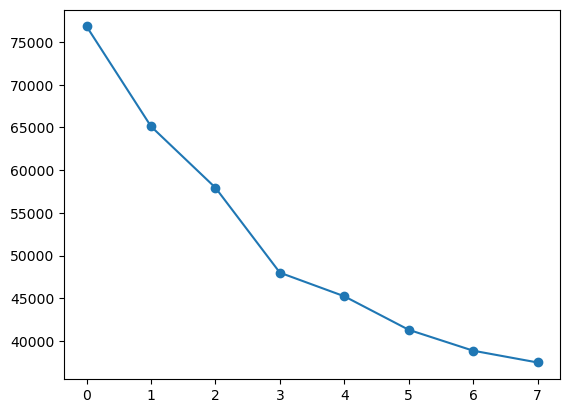

In [24]:
#elbow method
clusters = []
inertia_vals = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_clustering_scaled)
    clusters.append(kmeans)
    inertia_vals.append(kmeans.inertia_)
plt.plot(inertia_vals, marker='o')
plt.show()

In [25]:
# Silhouette score
print(clusters[1])
print("Silhouette score for k=3", silhouette_score(data_clustering_scaled, clusters[1].predict(data_clustering_scaled)))
print(clusters[2])
print("Silhouette score for k=4", silhouette_score(data_clustering_scaled, clusters[2].predict(data_clustering_scaled)))
print(clusters[3])
print("Silhouette score for k=5", silhouette_score(data_clustering_scaled, clusters[2].predict(data_clustering_scaled)))

KMeans(n_clusters=3, random_state=42)
Silhouette score for k=3 0.28489524721726434
KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.20994982479812044
KMeans(n_clusters=5, random_state=42)
Silhouette score for k=5 0.20994982479812044


In [26]:
# modelling qith scaled/standardised data
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(data_clustering_scaled)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", kmeans_scaled.inertia_)

print("Centroid locations:")
for centroid in kmeans_scaled.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 65117.42770612577
Centroid locations:
[ 0.71072392  0.85765468 -0.13186751 -0.14712594  1.02026448]
[-0.38038856 -0.46561967 -0.14447548 -0.25558336 -0.53166282]
[0.08594033 0.14561118 1.35112612 2.10749826 0.03185678]


In [27]:
#kmeans without standardization and comparing
kmeans_not_scaled = KMeans(n_clusters = 3, random_state= 42)
kmeans_not_scaled.fit(data_clustering)
print("Sum of intra-cluster distance of non-standarised clustering:", kmeans_not_scaled.inertia_)
print("Sum of intra-cluster distance of standarised clustering:", kmeans_scaled.inertia_)

Sum of intra-cluster distance of non-standarised clustering: 2671925.888063943
Sum of intra-cluster distance of standarised clustering: 65117.42770612577


In [28]:
predictions_without_scaling = kmeans_not_scaled.predict(data_clustering)
predictions_with_scaling = kmeans_scaled.predict(data_clustering_scaled)

# Assigning the cluster labels back to the scaled data
clustered_df = pd.DataFrame(data_clustering_scaled, columns=selected_features)
clustered_df['Cluster'] = predictions_with_scaling

# Assigning the cluster labels back to the scaled data
clustered_df_not_scaled = pd.DataFrame(data_clustering, columns=selected_features)
clustered_df_not_scaled['Cluster'] = predictions_without_scaling

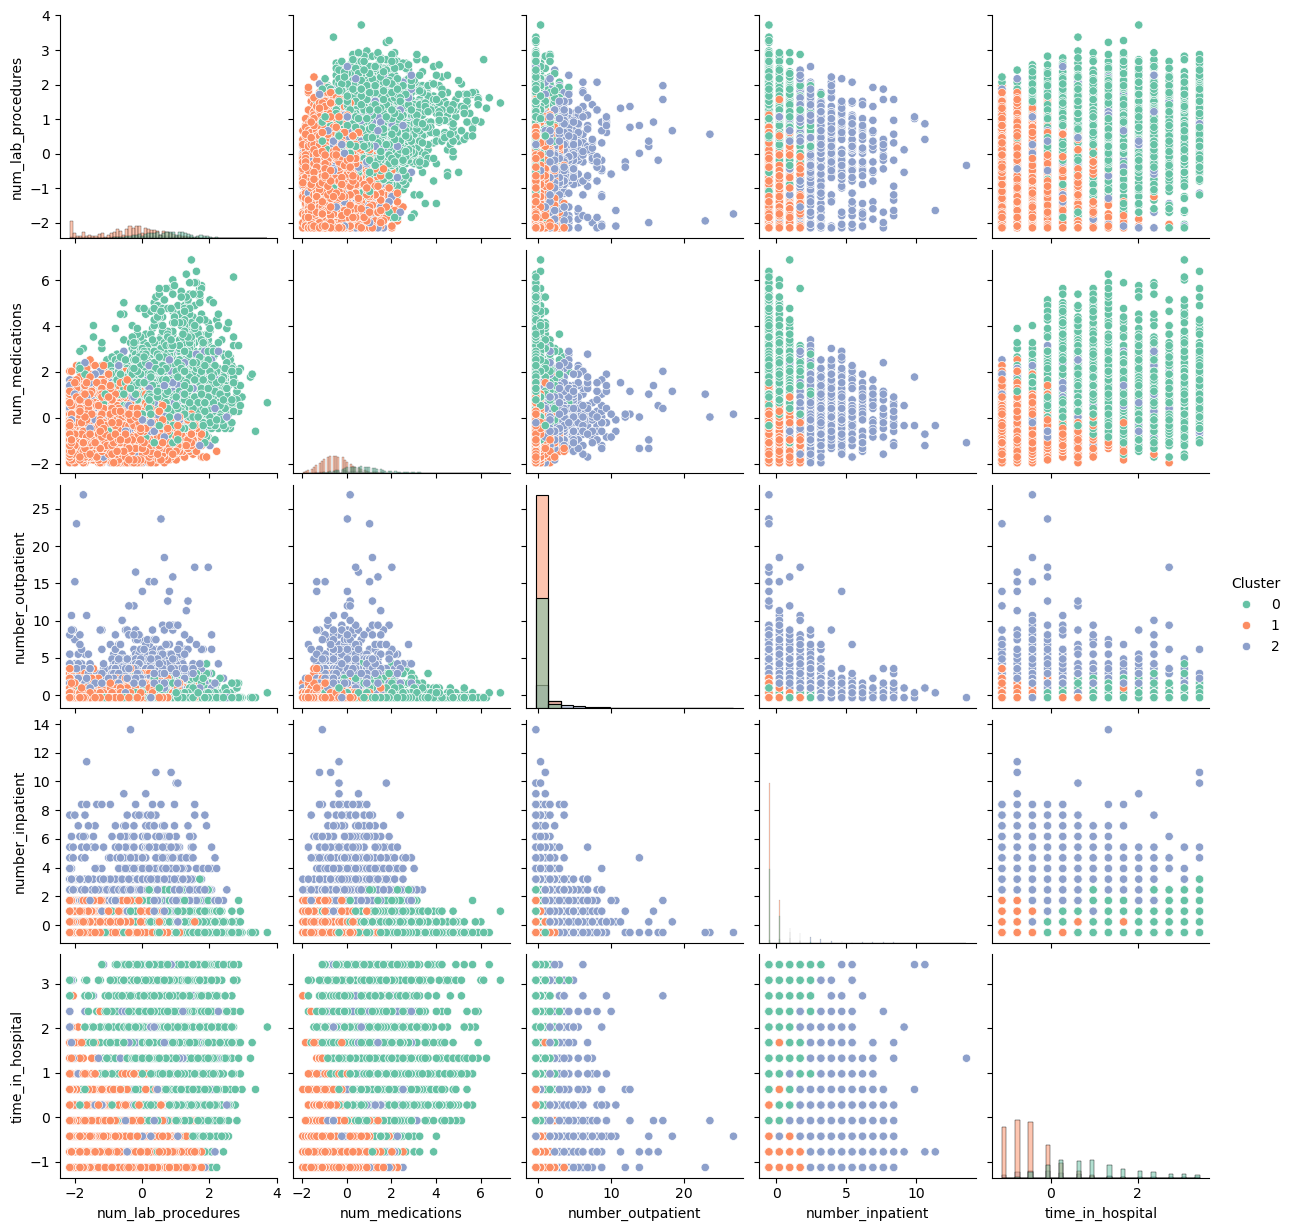

In [29]:
sns.pairplot(clustered_df, hue='Cluster', diag_kind='hist', palette="Set2")
plt.savefig('clustering_scaled.png')
plt.show()

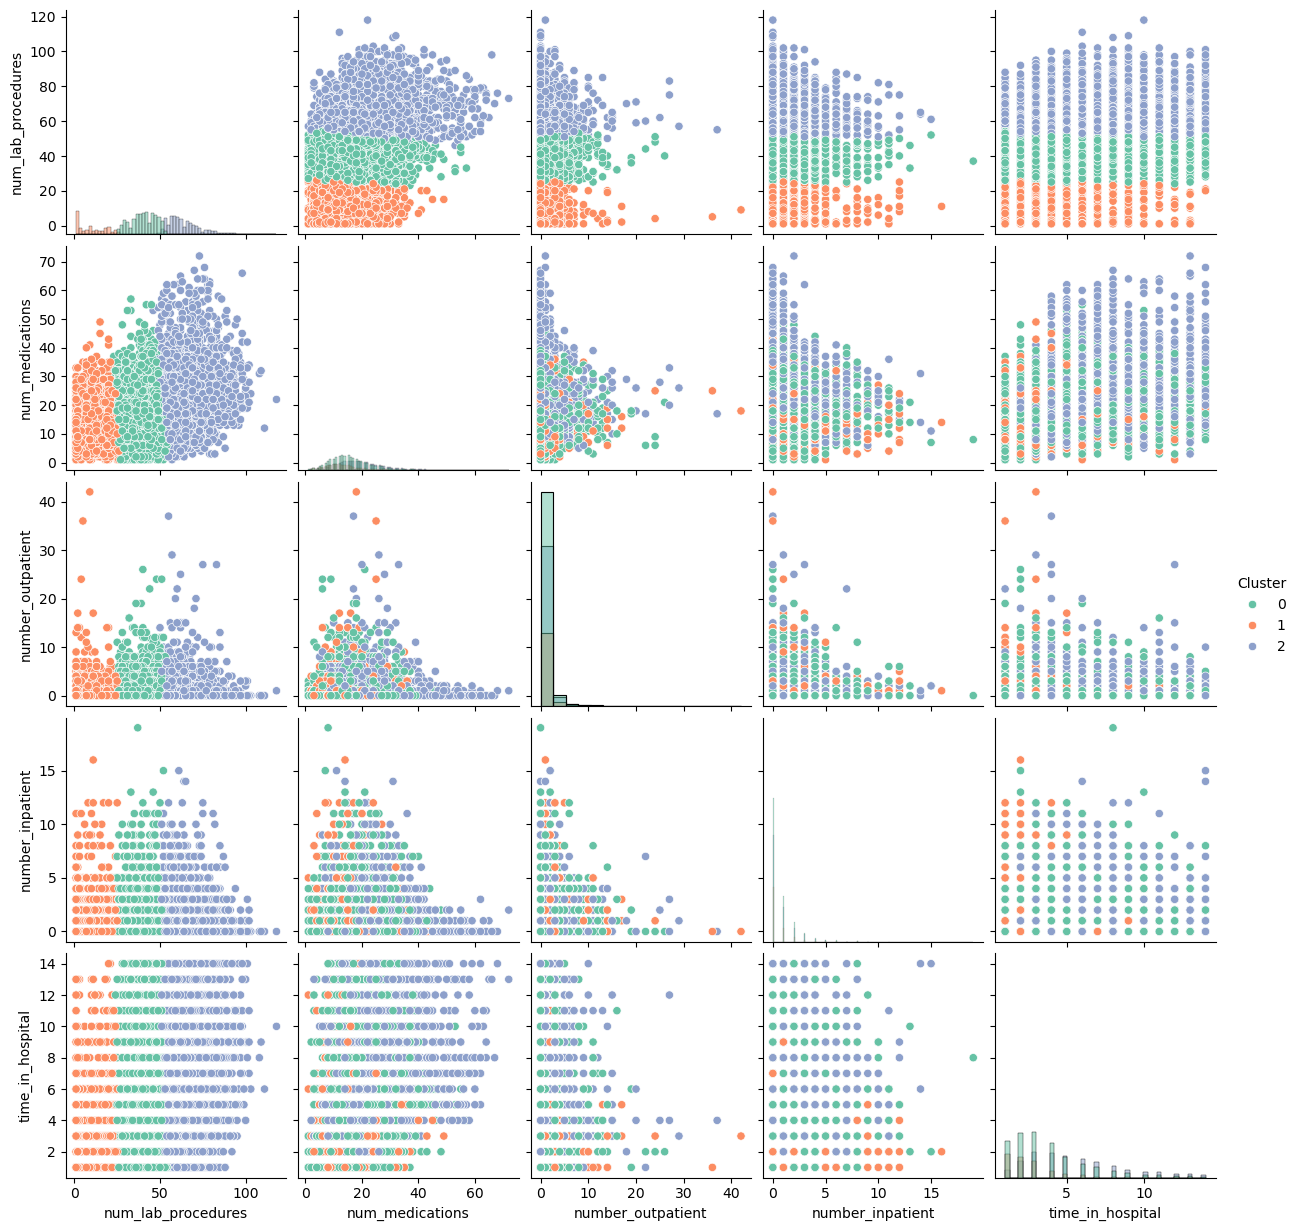

In [30]:
sns.pairplot(clustered_df_not_scaled, hue='Cluster', diag_kind='hist', palette="Set2")
plt.savefig('clustering_scaled.png')
plt.show()

Distribution for cluster 0


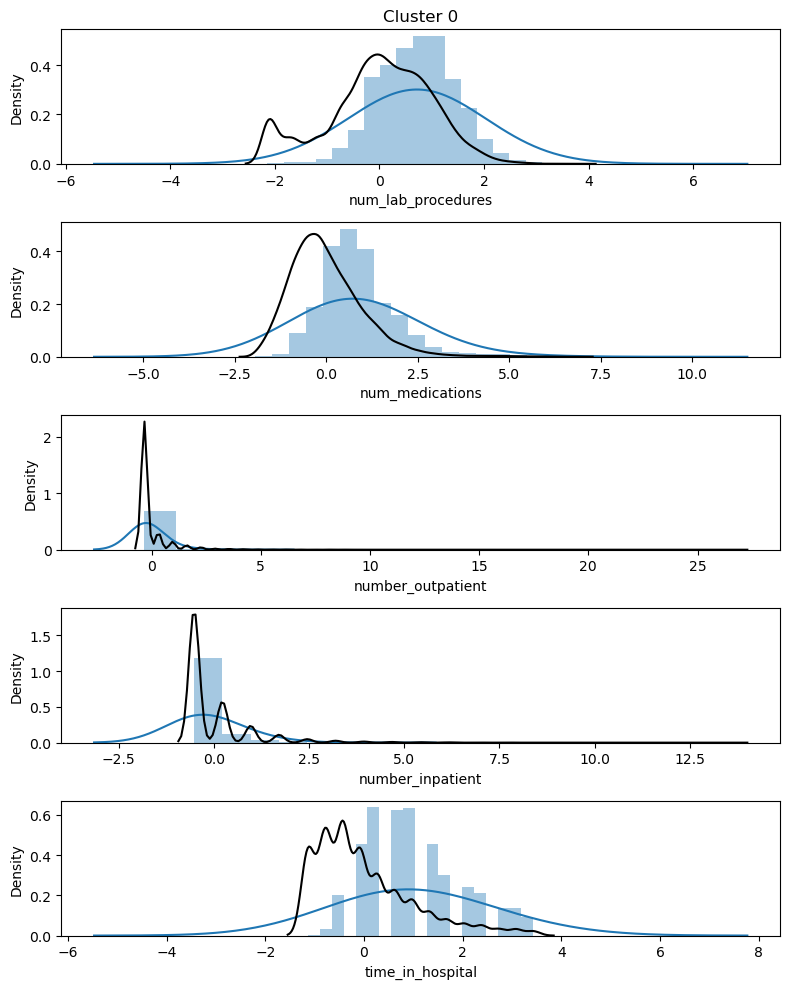

Distribution for cluster 1


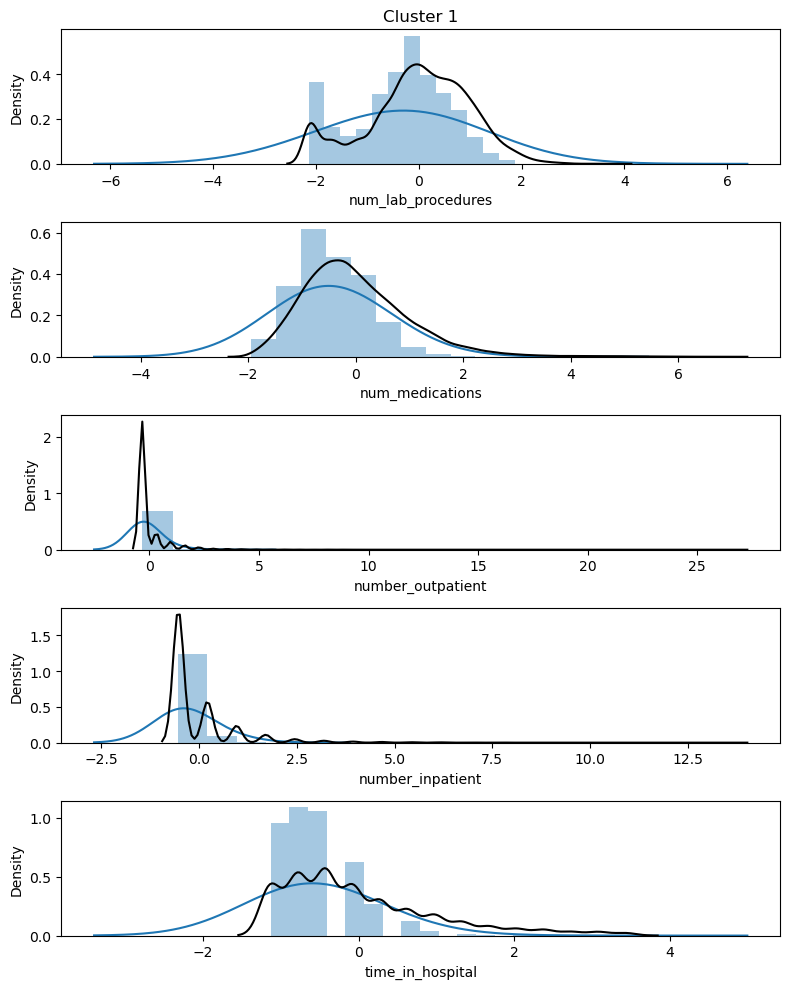

Distribution for cluster 2


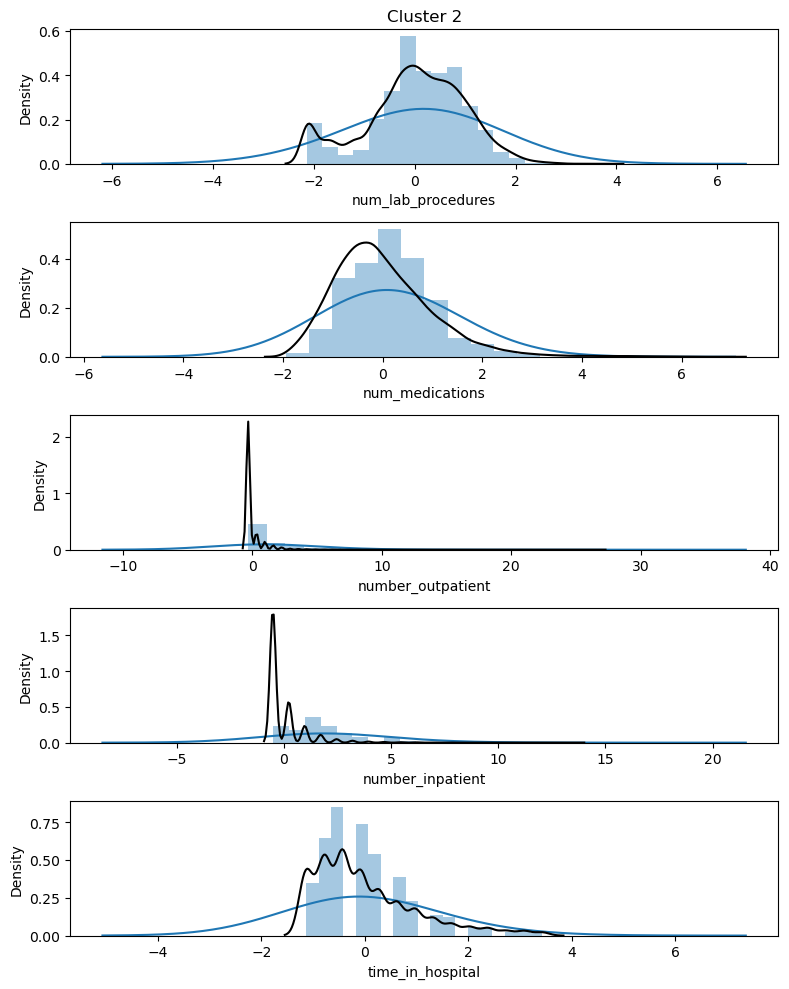

In [31]:
# sclaed data clusters inspection
cols = selected_features
n_bins = 20

clusters_to_inspect = [0, 1, 2]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # Dynamically create subplots based on the number of features
    fig, ax = plt.subplots(nrows=len(cols), figsize=(8, len(cols) * 2))  # Adjusting figsize for better visualization
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(clustered_df[col]), max(clustered_df[col]), 20)  # Define bins for the histogram
        sns.distplot(clustered_df[clustered_df['Cluster'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
        sns.distplot(clustered_df[col], bins=bins, ax=ax[j], hist=False, color="k")  # Plot overall distribution in black

    plt.tight_layout()
    plt.savefig(f"kmeans_clusters{cluster}.png")
    plt.show()

In [32]:
# 2nd model with 'age' inclusion
data['age'].unique()

array(['[80-90)', '[70-80)', '[50-60)', '[40-50)', '[60-70)', '[90-100)',
       '[30-40)', '[10-20)', '[20-30)', '[0-10)'], dtype=object)

In [33]:
# age mapping
age_map = {'[0-10)': 0, '[10-20)': 1, '[20-30)': 2, '[30-40)': 3, '[40-50)': 4, 
               '[50-60)': 5, '[60-70)': 6, '[70-80)': 7, '[80-90)': 8, '[90-100)': 9}
data['age_mapped'] = data['age'].map(age_map)

selected_features = ['num_lab_procedures', 'num_medications', 'number_outpatient', 'number_inpatient', 'time_in_hospital','age_mapped']
data_clustering = data[selected_features]

# convert selected data to matrix
X = data_clustering.to_numpy()

# scaling
X = scaler.fit_transform(data_clustering)

In [34]:
data_clustering

num_lab_procedures  num_medications  number_outpatient  \
0                      33               14                  0   
1                      48                7                  0   
2                      25               15                  0   
3                      41               19                  0   
4                      22               12                  0   
...                   ...              ...                ...   
19995                  51               12                  3   
19996                  57               28                  3   
19997                  41               18                  0   
19998                  49               15                  0   
19999                  54               14                  2   

       number_inpatient  time_in_hospital  age_mapped  
0                     1                 1           8  
1                     2                 3           7  
2                     0                 3           5  
3                     0                 6           5  
4                     1                 4           8  
...                 ...               ...         ...  
19995                 2                 4           7  
19996                 5                 9           5  
19997                 0                 3           8  
19998                 5                 3           5  
19999                 0                 8           8  

[20000 rows x 6 columns]

In [35]:
#Keeping 3 K as instructed for K-prototype (2nd clustering)                                                                                             
kproto = KPrototypes(n_clusters=3, random_state=42)
kproto.fit_predict(X, categorical=[5])
clusters = kproto.fit_predict(data_clustering, categorical=[5])                                                                                                                           
data_clustering['Cluster']  = clusters
print("Cluster centroids:", kproto.cluster_centroids_)

Cluster centroids: [[63.6281198  19.78424847  0.54811425  0.74542429  5.53813089  7.        ]
 [40.2273872  15.72130115  0.48782791  0.71070304  3.7752361   7.        ]
 [10.01258441 12.72437078  0.50245549  0.57519951  2.64456722  7.        ]]


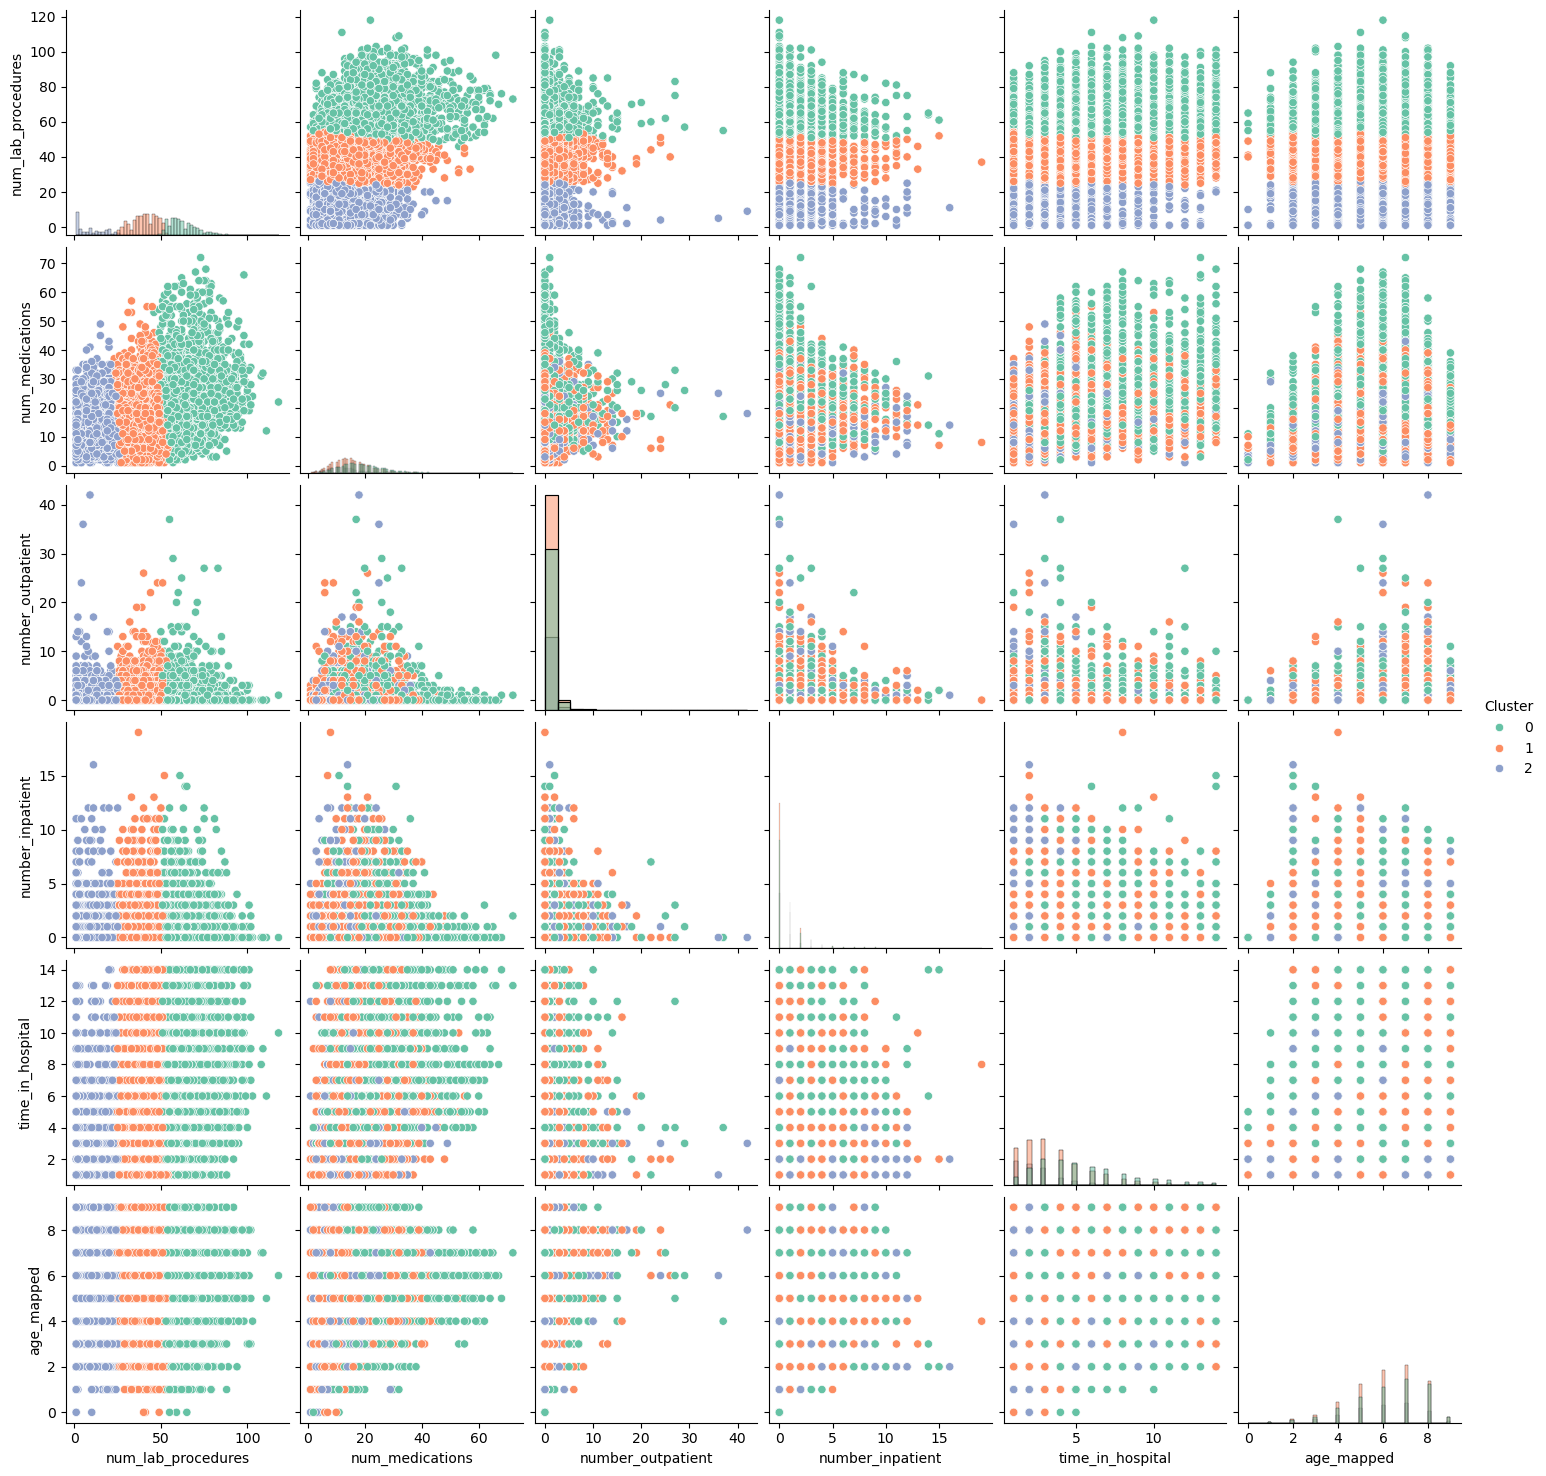

In [36]:
sns.pairplot(data_clustering, hue='Cluster', diag_kind='hist',palette="Set2")
plt.savefig('kproto_clustering.png')
plt.show()

Distribution for cluster 0


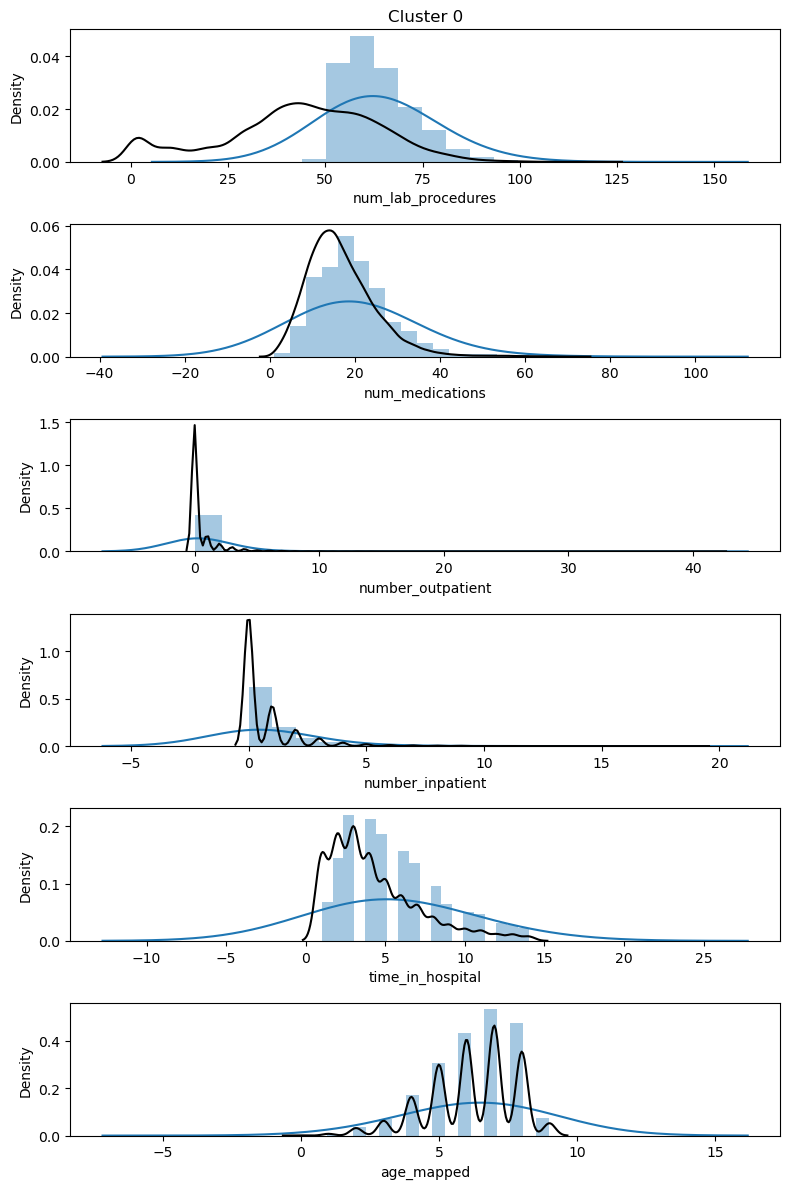

Distribution for cluster 1


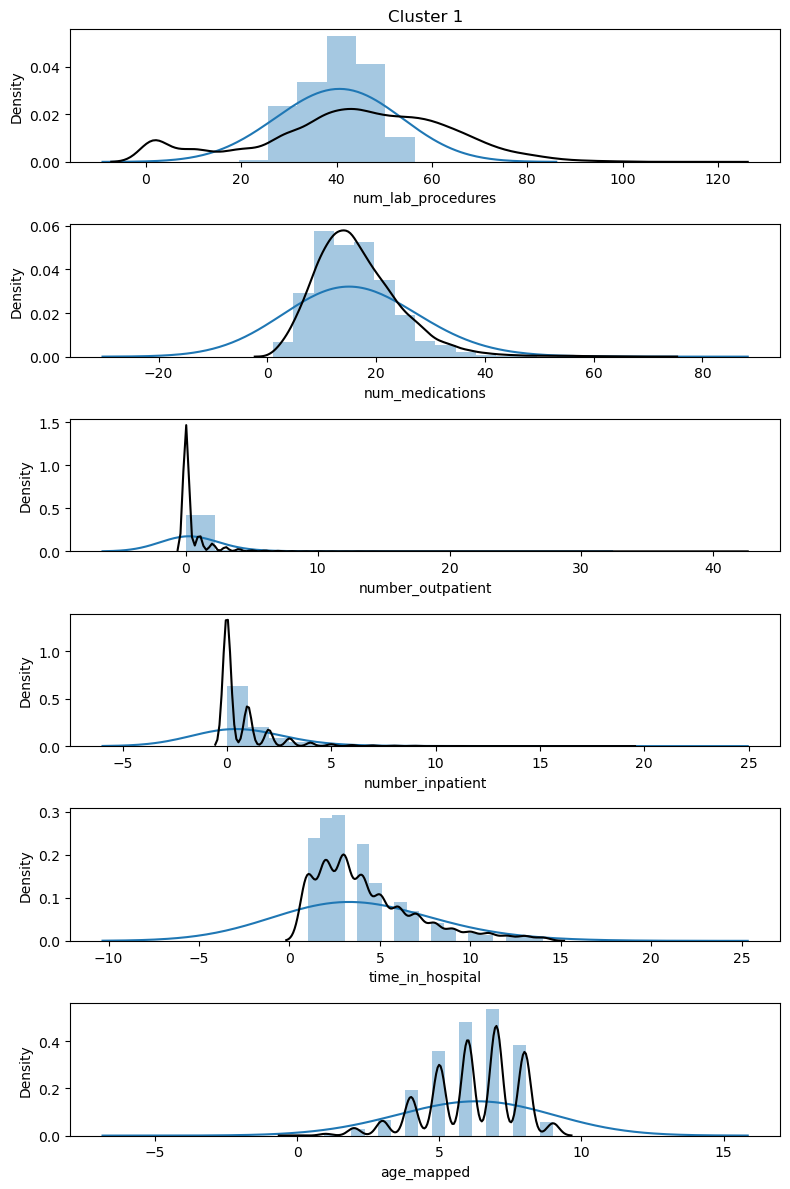

Distribution for cluster 2


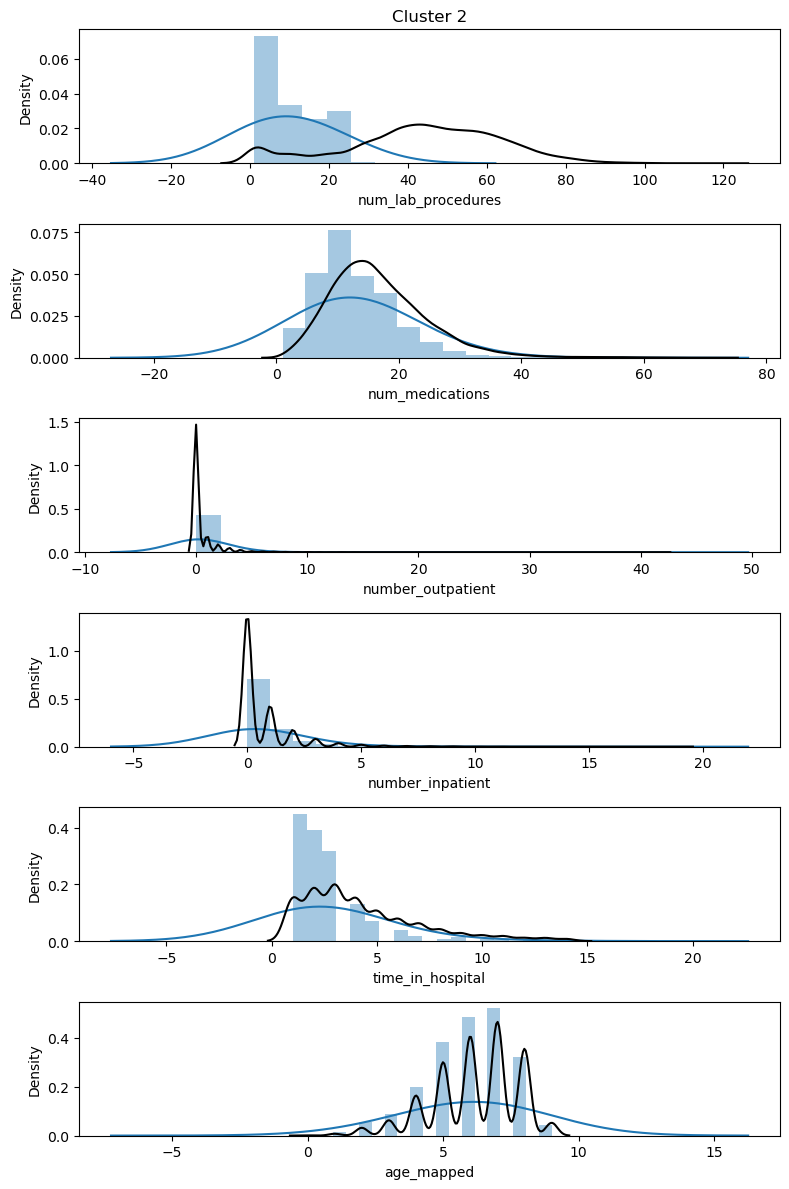

In [37]:
cols = selected_features
n_bins = 20

clusters_to_inspect = [0, 1, 2]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # Dynamically create subplots based on the number of features
    fig, ax = plt.subplots(nrows=len(cols), figsize=(8, len(cols) * 2))  # Adjusting figsize for better visualization
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(data_clustering[col]), max(data_clustering[col]), 20)  # Define bins for the histogram
        sns.distplot(data_clustering[data_clustering['Cluster'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
        sns.distplot(data_clustering[col], bins=bins, ax=ax[j], hist=False, color="k")  # Plot overall distribution in black

    plt.tight_layout()
    plt.savefig(f"kproto_clusters{cluster}.png")
    plt.show()

## Predictive Mining with Decision Tree

In [38]:
data = pd.read_csv('data/D2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [39]:
print(data.columns)
print("------------------------------------------------------")
print(data['race'].unique())

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
------------------------------------------------------
['AfricanAmerican' 'Caucasian' 'Other' 'Asian' 'Hispanic']


In [40]:
unary_columns = [col for col in data.columns if data[col].nunique() == 1]
unary_columns

['acetohexamide', 'tolbutamide']

In [41]:
## no redundant and no derived variables, only unary_columns
categorical_columns = ['race', 'gender', 'age', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 
                       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                       'glipizide', 'glyburide', 'insulin', 'change','diabetesMed']
#dropping IDs and Unary columns 
dropping_cols = ['admission_type_id', 'discharge_disposition_id','admission_source_id', 'readmitted', 'acetohexamide', 'tolbutamide']


# Apply Label Encoding for categorical features
label_encoder = LabelEncoder()

#store encoders to reverse the encoding
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Save each encoder to disk
with open('decisionT_label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [42]:
# Split the data into features (X) and target (y)

X = data.drop(dropping_cols, axis=1)
y = data['readmitted']

In [43]:
# Perform a train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 24), (6000, 24), (14000,), (6000,))

In [44]:
# Fit Decision Tree
# Initialize the Decision Tree with default setting
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
#Accuracies and classification report
print("Default Decision Tree\n")
print("Train accuracy:", decision_tree.score(X_train, y_train))
print("Test accuracy:", decision_tree.score(X_test, y_test))

print("-------------------------------------------------------")
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")

Default Decision Tree

Train accuracy: 1.0
Test accuracy: 0.5643333333333334
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      3203
           1       0.53      0.53      0.53      2797

    accuracy                           0.56      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.56      0.56      0.56      6000

-------------------------------------------------------


In [46]:
# Get the size of the tree (number of nodes and rules)
n_nodes = decision_tree.tree_.node_count
n_rules = decision_tree.get_n_leaves()
print(f"Number of nodes: {n_nodes}")
print(f"Number of Rules: {n_rules}")
# Get the feature used for the first split (root node)
first_split_feature = X.columns[decision_tree.tree_.feature[0]]
print("------------------------------------------------------------")
print(f"The variable used for the first split is: {first_split_feature}")

Number of nodes: 8053
Number of Rules: 4027
------------------------------------------------------------
The variable used for the first split is: number_inpatient


In [47]:
# grab feature importances from the model and feature name from the original X
importances = decision_tree.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', round(importances[i],4))

num_lab_procedures : 0.1919
num_medications : 0.148
time_in_hospital : 0.095
age : 0.0696
number_inpatient : 0.0675


In [48]:
#tree parameters
print(decision_tree.get_params(deep = True))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


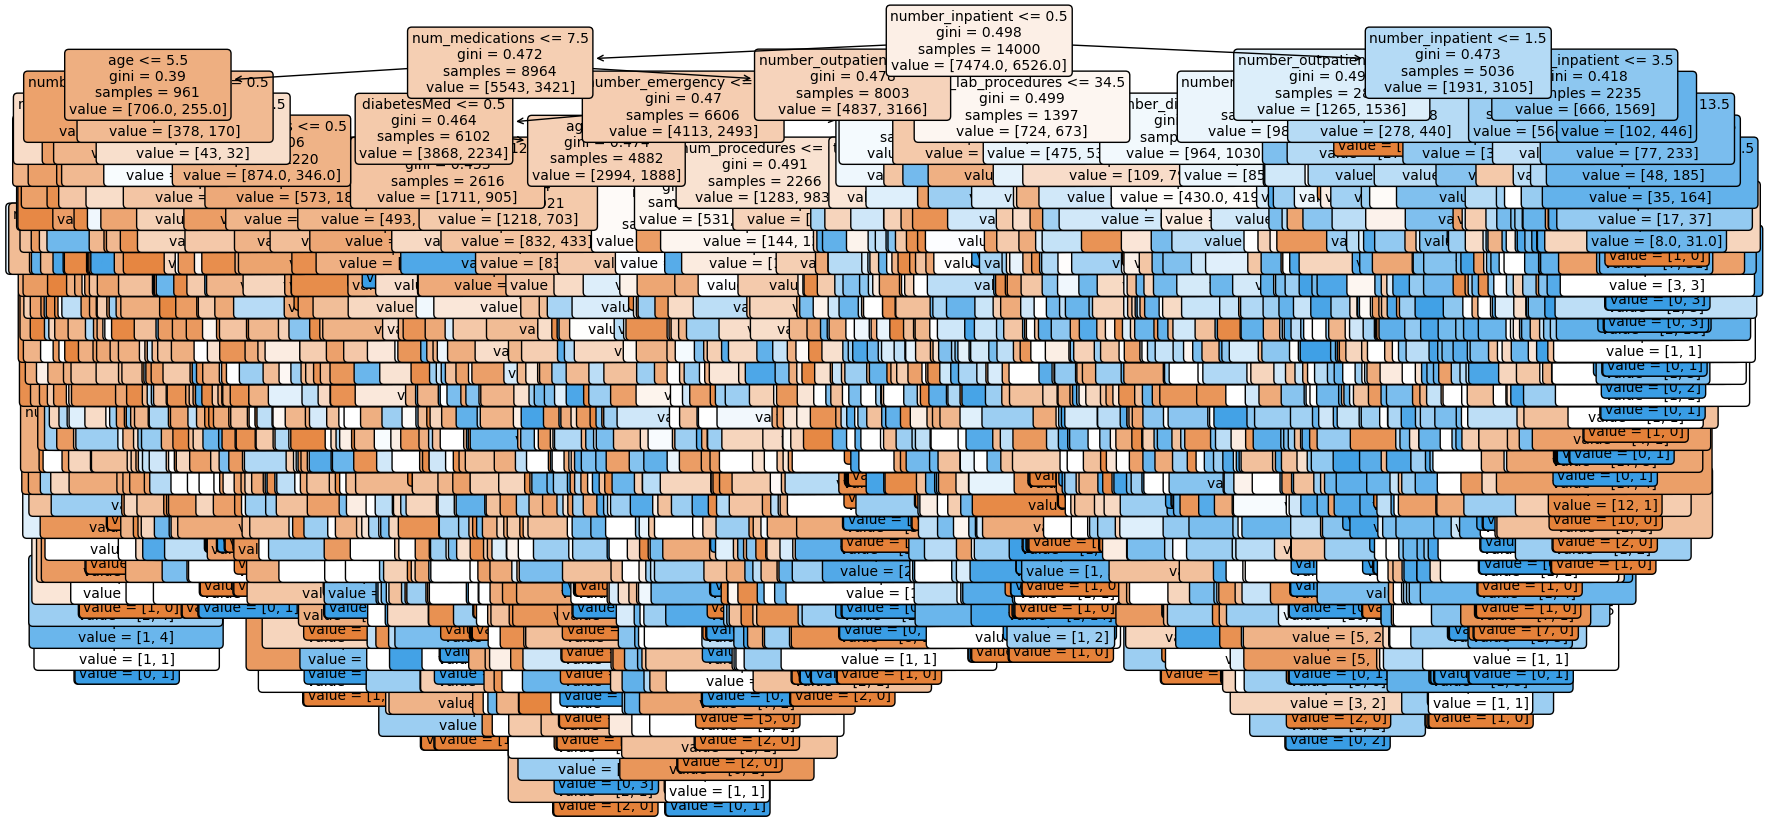

In [49]:
# Set the figure size for better visibility
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(decision_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)

# Display the plot
plt.show()

In [50]:
# visualize
dotfile = StringIO()
export_graphviz(decision_tree, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz.png") 

In [51]:
#decision tree tuned with GridSearchCV.
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_tree = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=42),return_train_score=True, cv=10)
cv_tree.fit(X_train, y_train)

result_set = cv_tree.cv_results_
print(result_set)

{'mean_fit_time': array([0.01009629, 0.00924764, 0.00925446, 0.0099628 , 0.0128051 ,
       0.01255238, 0.01245601, 0.01250205, 0.01585026, 0.01635416,
       0.01609657, 0.01585717, 0.01950488, 0.02024806, 0.01735532,
       0.01760087, 0.02059424, 0.02064841, 0.02055955, 0.02030883,
       0.02373981, 0.02360852, 0.02475498, 0.02349987, 0.02679763,
       0.02705626, 0.02633817, 0.02641041, 0.02949955, 0.02915413,
       0.02896283, 0.02899721, 0.0327965 , 0.03557119, 0.03309791,
       0.03175859, 0.03598654, 0.03563321, 0.03410294, 0.03329315,
       0.03856027, 0.03744311, 0.03793826, 0.03590946, 0.04133534,
       0.03955548, 0.03820744, 0.03671365, 0.04425261, 0.04124281,
       0.03985729, 0.03830178, 0.04640832, 0.04335711, 0.04094975,
       0.03935511, 0.04794562, 0.04434292, 0.04195607, 0.03971059,
       0.00855031, 0.00885887, 0.0089009 , 0.00839741, 0.01163702,
       0.01155357, 0.01155324, 0.01320212, 0.01844976, 0.01535394,
       0.0153996 , 0.01509414, 0.01859553, 0

Total number of models:  120


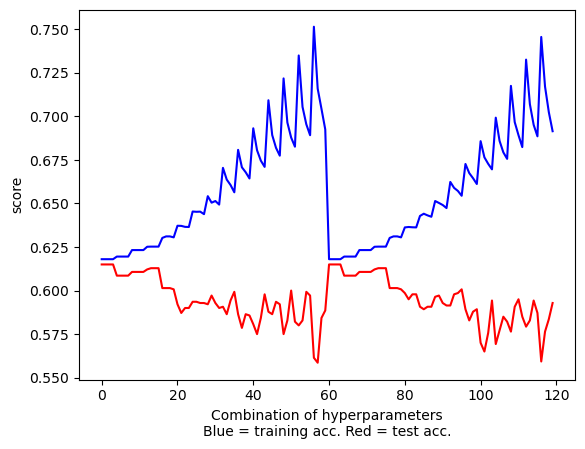

In [52]:
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

#plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

In [53]:
print(cv_tree.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}


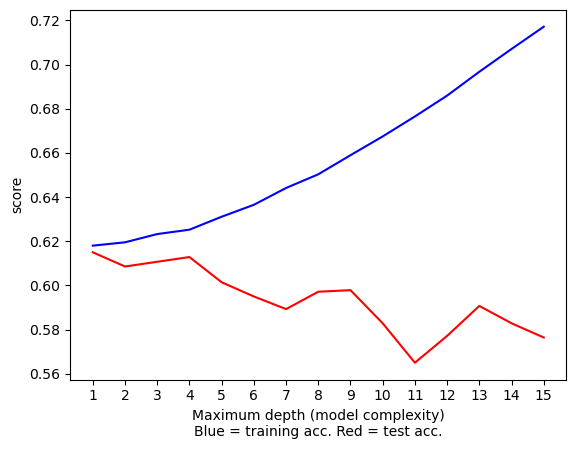

In [54]:
result_set['params']
dd = pd.DataFrame(result_set['params'])
index_ = list(dd.index[(dd['criterion']=='entropy') & (dd['min_samples_leaf']==10)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

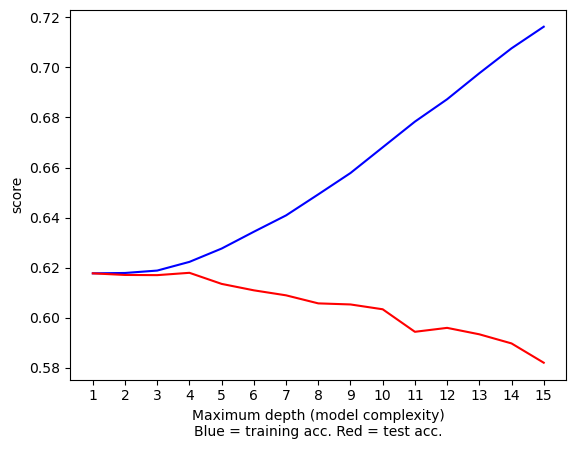

In [55]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.savefig('gridsearchCV_traintest_acc.png')
plt.show()

In [56]:
# fittinng cv_tree
cv_tree.fit(X_train, y_train)
print("Train accuracy of CV tree:", cv_tree.score(X_train, y_train))
print("Test accuracy of CV tree:", cv_tree.score(X_test, y_test))

Train accuracy of CV tree: 0.6230714285714286
Test accuracy of CV tree: 0.6176666666666667


In [57]:
# Get the size of the tree (number of nodes and rules)
cv_tree_size = cv_tree.best_estimator_
n_nodes = cv_tree_size.tree_.node_count
n_rules = cv_tree_size.get_n_leaves()
print(f"Number of nodes: {n_nodes}")
print(f"Number of rules: {n_rules}")

Number of nodes: 31
Number of rules: 16


In [58]:
def analyse_feature_importance(model, feature_names, n_to_display=5):
    # grab feature importances from the model
    importances = model.feature_importances_
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    indices = indices[:n_to_display]
    
    for i in indices:
        print(feature_names[i], ':', importances[i])

def visualize_decision_tree(model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) 

In [59]:
analyse_feature_importance(cv_tree.best_estimator_, X.columns,5)
visualize_decision_tree(cv_tree.best_estimator_, X.columns, "cv_tree.png")

number_inpatient : 0.7662657504883603
number_outpatient : 0.06284565166549513
num_medications : 0.05154768597091513
number_emergency : 0.051281098849472656
age : 0.02891670729576608


In [60]:
best_tree = cv_tree.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = best_tree.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = Not Readmitted, 1 = Readmitted). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = Not Readmitted, 1 = Readmitted). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.4834503510531595 	 0.5165496489468405 	 0
0.6338905276958374 	 0.3661094723041626 	 0
0.6338905276958374 	 0.3661094723041626 	 1
0.38288920056100983 	 0.6171107994389902 	 1
0.6338905276958374 	 0.3661094723041626 	 0
0.6338905276958374 	 0.3661094723041626 	 0
0.6338905276958374 	 0.3661094723041626 	 0
0.4834503510531595 	 0.5165496489468405 	 1
0.6338905276958374 	 0.3661094723041626 	 1
0.6338905276958374 	 0.3661094723041626 	 1
0.4721669980119284 	 0.5278330019880716 	 0
0.6338905276958374 	 0.3661094723041626 	 1
0.8115183246073299 	 0.18848167539267016 	 0
0.6368286445012787 	 0.3631713554987212 	 1
0.4834503510531595 	 0.5165496489468405 	 0
0.31118060985144647 	 0.6888193901485535 	 1
0.4861111111111111 	 0.5138888888888888 	 0
0.6338905276958374 	 

In [61]:
y_pred_proba_dt = decision_tree.predict_proba(X_test)
y_pred_proba_cv = cv_tree.predict_proba(X_test)
roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_cv[:, 1])
print("ROC index on test for DecisionTree_default:", roc_index_dt)
print("ROC index on test for DecisionTree_optimal:", roc_index_dt_cv)

ROC index on test for DecisionTree_default: 0.5622386993959342
ROC index on test for DecisionTree_optimal: 0.6454109711901974


In [62]:
# Get the feature used for the first split (root node)
first_split_feature_index = cv_tree.best_estimator_.tree_.feature[0]
first_split_feature_name = X.columns[first_split_feature_index]

print(f"The variable used for the first split is: {first_split_feature_name}")

The variable used for the first split is: number_inpatient


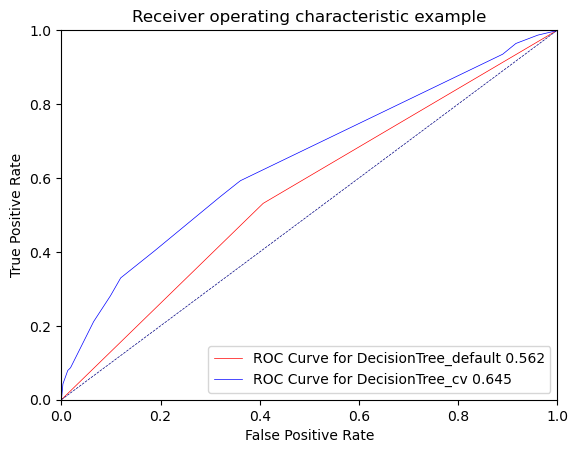

In [63]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_cv[:,1])
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DecisionTree_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DecisionTree_cv {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [64]:

# Use the better (fine-tuned) model to predict the class labels on the test set
y_pred_proba_cv = best_tree.predict(X_test)

# Create a DataFrame to hold the test data and the predicted readmission labels
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Predicted_Readmission'] = y_pred_proba_cv

# Filter the patients who are predicted to be readmitted (Predicted_Readmission = 1)
patients_readmitted = test_data_with_predictions[test_data_with_predictions['Predicted_Readmission'] == 1]

In [65]:
#reversing the encoding
with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

# First, check if the columns contain encoded values
for col in categorical_columns:
    print(f"Unique values in {col}: {patients_readmitted[col].unique()}")

Unique values in race: [2 0 4 1 3]
Unique values in gender: [1 0]
Unique values in age: [8 6 5 4 7 3 2 9 1]
Unique values in medical_specialty: [13 14  0 21 43  3  6 36  9 22 19 15 23 34 45 48 35 30 28  7 20 50 33 16
 42 11 12 41  2 40 32 27 31 49]
Unique values in max_glu_serum: [3 2 1 0]
Unique values in A1Cresult: [3 2 1 0]
Unique values in metformin: [1 2 3 0]
Unique values in repaglinide: [1 2 3]
Unique values in nateglinide: [2 1]
Unique values in chlorpropamide: [0 1]
Unique values in glimepiride: [2 1 0 3]
Unique values in glipizide: [1 0 2 3]
Unique values in glyburide: [1 2 0 3]
Unique values in insulin: [0 1 2 3]
Unique values in change: [1 0]
Unique values in diabetesMed: [1 0]


In [66]:
# Load the encoders from the saved file
with open('decisionT_label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

# List of categorical columns that were encoded
categorical_columns = ['race', 'gender', 'age', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 
                       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                       'glipizide', 'glyburide', 'insulin', 'change','diabetesMed']


for col in categorical_columns:
    if col in label_encoders:
        if (patients_readmitted[col].dtype == 'int64'or patients_readmitted[col].dtype == 'int32'):
            patients_readmitted[col] = label_encoders[col].inverse_transform(patients_readmitted[col].values)

# Display a sample of the dataframe after reversing the encoded columns
patients_readmitted.head()

race  gender      age  time_in_hospital medical_specialty  \
4153         Caucasian    Male  [80-90)                 8  InternalMedicine   
16738  AfricanAmerican  Female  [80-90)                11           Invalid   
8942   AfricanAmerican    Male  [60-70)                 3           Invalid   
10855        Caucasian    Male  [60-70)                 2           Invalid   
13348        Caucasian    Male  [60-70)                13           Invalid   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
4153                   58               3               36                  0   
16738                  37               0                6                  1   
8942                   27               3               21                  0   
10855                  51               0                8                  3   
13348                  11               0               10                  0   

       number_emergency  ...  repaglinide  nateglinide chlorpropamide  \
4153                  0  ...           No       Steady             No   
16738                 0  ...           No           No             No   
8942                  0  ...           No           No             No   
10855                 0  ...           No           No             No   
13348                 0  ...           No           No             No   

      glimepiride glipizide glyburide insulin change diabetesMed  \
4153       Steady        No        No    Down   True        True   
16738          No        No        No      No  False       False   
8942           No        No        No    Down   True        True   
10855          No        No        No  Steady  False        True   
13348          No        No        No  Steady  False        True   

      Predicted_Readmission  
4153                      1  
16738                     1  
8942                      1  
10855                     1  
13348                     1  

[5 rows x 25 columns]

In [67]:
patients_readmitted

race  gender      age  time_in_hospital medical_specialty  \
4153         Caucasian    Male  [80-90)                 8  InternalMedicine   
16738  AfricanAmerican  Female  [80-90)                11           Invalid   
8942   AfricanAmerican    Male  [60-70)                 3           Invalid   
10855        Caucasian    Male  [60-70)                 2           Invalid   
13348        Caucasian    Male  [60-70)                13           Invalid   
...                ...     ...      ...               ...               ...   
7014         Caucasian  Female  [50-60)                 3  InternalMedicine   
1861         Caucasian  Female  [70-80)                 3           Invalid   
13486        Caucasian    Male  [50-60)                 6           Invalid   
13503  AfricanAmerican    Male  [40-50)                 5           Invalid   
6421         Caucasian    Male  [70-80)                 5           Invalid   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
4153                   58               3               36                  0   
16738                  37               0                6                  1   
8942                   27               3               21                  0   
10855                  51               0                8                  3   
13348                  11               0               10                  0   
...                   ...             ...              ...                ...   
7014                   45               0               13                  0   
1861                   64               0               18                  0   
13486                  31               0               24                  0   
13503                  49               2               14                  0   
6421                   47               0               20                  5   

       number_emergency  ...  repaglinide  nateglinide chlorpropamide  \
4153                  0  ...           No       Steady             No   
16738                 0  ...           No           No             No   
8942                  0  ...           No           No             No   
10855                 0  ...           No           No             No   
13348                 0  ...           No           No             No   
...                 ...  ...          ...          ...            ...   
7014                  2  ...           No           No             No   
1861                  1  ...           No           No             No   
13486                 0  ...           No           No             No   
13503                 1  ...           No           No             No   
6421                  1  ...           No           No             No   

      glimepiride glipizide glyburide insulin change diabetesMed  \
4153       Steady        No        No    Down   True        True   
16738          No        No        No      No  False       False   
8942           No        No        No    Down   True        True   
10855          No        No        No  Steady  False        True   
13348          No        No        No  Steady  False        True   
...           ...       ...       ...     ...    ...         ...   
7014           No        No    Steady  Steady   True        True   
1861           No    Steady        No  Steady   True        True   
13486          No        No        No  Steady   True        True   
13503          No        No        No  Steady  False        True   
6421       Steady        No        No  Steady   True        True   

      Predicted_Readmission  
4153                      1  
16738                     1  
8942                      1  
10855                     1  
13348                     1  
...                     ...  
7014                      1  
1861                      1  
13486                     1  
13503                     1  
6421                      1  

[2783 rows x 25 columns]

In [68]:
analyse_feature_importance(cv_tree.best_estimator_, X.columns,5)

number_inpatient : 0.7662657504883603
number_outpatient : 0.06284565166549513
num_medications : 0.05154768597091513
number_emergency : 0.051281098849472656
age : 0.02891670729576608


In [69]:
# From analyse_feature_importance function
top_5_features = ['number_inpatient','number_outpatient','num_medications','number_emergency','age']
print(patients_readmitted[top_5_features].describe())
print('-----------------------------------------------------------------------------------')
print('summary:',patients_readmitted['age'].value_counts())

       number_inpatient  number_outpatient  num_medications  number_emergency
count       2783.000000        2783.000000      2783.000000       2783.000000
mean           1.537909           0.920589        17.447718          0.551922
std            1.724538           1.861627         7.560733          1.297324
min            0.000000           0.000000         1.000000          0.000000
25%            1.000000           0.000000        12.000000          0.000000
50%            1.000000           0.000000        16.000000          0.000000
75%            2.000000           1.000000        22.000000          1.000000
max           15.000000          29.000000        65.000000         22.000000
-----------------------------------------------------------------------------------
summary: age
[70-80)     704
[60-70)     595
[80-90)     571
[50-60)     429
[40-50)     235
[30-40)      98
[90-100)     93
[20-30)      51
[10-20)       7
Name: count, dtype: int64


In [70]:
print(data.shape)
print(patients_readmitted.shape)

(20000, 30)
(2783, 25)


In [71]:
#saving best tree
import pickle
dt_best = cv_tree
roc_index_dt_best = roc_index_dt_cv
fpr_dt_best = fpr_dt_cv
tpr_dt_best = tpr_dt_cv, 

with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best, roc_index_dt_best, fpr_dt_best, tpr_dt_best], f)

## Predictive Mining with Regression

In [72]:
data = pd.read_csv('data/D2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

In [73]:
categorical_columns = ['race', 'gender', 'age', 'medical_specialty',
                       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                       'glipizide', 'glyburide', 'insulin', 'change','diabetesMed'] 
#dropping IDs, Unary columns, and huge missing-values variables 
dropping_cols = ['admission_type_id', 'discharge_disposition_id','admission_source_id', 'readmitted', 'acetohexamide',   
                 'tolbutamide','max_glu_serum','A1Cresult']


# Apply Label Encoding for categorical features
label_encoder = LabelEncoder()

#store encoders to reverse the encoding
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

#Saving Encoders to Disk for Future Use:
import pickle

# Save each encoder to disk
with open('regresion_label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [74]:
# Split the data into features (X) and target (y)

X = data.drop(dropping_cols, axis=1)
y = data['readmitted']

In [75]:

# Perform a train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 22), (6000, 22), (14000,), (6000,))

In [76]:
# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train.iloc[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 0, max 4, mean 1.74 and std dev 0.80
Variable #1: min 0, max 1, mean 0.46 and std dev 0.50
Variable #2: min 0, max 9, mean 6.18 and std dev 1.57
Variable #3: min 1, max 14, mean 4.23 and std dev 2.84
Variable #4: min 0, max 50, mean 14.24 and std dev 9.02
After scaling
-------------
Variable #0: min -2.1700988822673057, max 2.8157687392543616, mean -0.00 and std dev 1.00
Variable #1: min -0.9269464642987548, max 1.0788109545857223, mean -0.00 and std dev 1.00
Variable #2: min -3.9464420262209816, max 1.7970861490682866, mean -0.00 and std dev 1.00
Variable #3: min -1.1369669369747704, max 3.4403768931711856, mean 0.00 and std dev 1.00
Variable #4: min -1.5777883409740718, max 3.963560800226616, mean 0.00 and std dev 1.00


In [77]:
model = LogisticRegression(random_state=42)
# fit it to training data
model.fit(X_train, y_train)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
print("-------------------------------------------------------")
# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")

Train accuracy: 0.6222142857142857
Test accuracy: 0.6331666666666667
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.81      0.70      3203
           1       0.66      0.43      0.52      2797

    accuracy                           0.63      6000
   macro avg       0.64      0.62      0.61      6000
weighted avg       0.64      0.63      0.62      6000

-------------------------------------------------------


In [78]:
print(model.coef_)

[[ 0.02643547 -0.01977475  0.06546272 -0.00214625 -0.03515313  0.03693873
  -0.07639825  0.05736629  0.14690907  0.25503796  0.50832292  0.08503142
  -0.06794304 -0.00896155 -0.0196651   0.0275674  -0.00729964  0.00796687
  -0.00434022 -0.07501854  0.0457862   0.14289784]]


In [79]:
feature_names = X.columns
coef = model.coef_[0]
# limit to 5 features
coef = coef[:]
for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

race : 0.026435469230499702
gender : -0.01977474531924614
age : 0.06546271744337367
time_in_hospital : -0.0021462462081572164
medical_specialty : -0.03515313169419559
num_lab_procedures : 0.03693872958975784
num_procedures : -0.07639824985221387
num_medications : 0.05736629052099849
number_outpatient : 0.14690907381744434
number_emergency : 0.2550379635671878
number_inpatient : 0.5083229179645071
number_diagnoses : 0.08503142386108614
metformin : -0.06794303644913406
repaglinide : -0.008961549549260506
nateglinide : -0.01966509672576096
chlorpropamide : 0.02756740416299623
glimepiride : -0.007299635545671594
glipizide : 0.007966874963687379
glyburide : -0.004340220460163666
insulin : -0.07501854323367417
change : 0.0457861982873294
diabetesMed : 0.1428978411791815


In [80]:
# top 5 feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', coef[i])

number_inpatient : 0.5083229179645071
number_emergency : 0.2550379635671878
number_outpatient : 0.14690907381744434
diabetesMed : 0.1428978411791815
number_diagnoses : 0.08503142386108614


In [81]:
# grid search model
from sklearn.model_selection import GridSearchCV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

grid_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=42),return_train_score=True, cv=10, n_jobs=-1)
grid_model.fit(X_train, y_train)
print("GridSearchCV regression model\n")
print("Train accuracy:", grid_model.score(X_train, y_train))
print("Test accuracy:", grid_model.score(X_test, y_test))
print("-------------------------------------------------------")
# classification report on test data
y_pred = grid_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print(grid_model.best_params_)

GridSearchCV regression model

Train accuracy: 0.6222142857142857
Test accuracy: 0.6331666666666667
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.81      0.70      3203
           1       0.66      0.43      0.52      2797

    accuracy                           0.63      6000
   macro avg       0.64      0.62      0.61      6000
weighted avg       0.64      0.63      0.62      6000

-------------------------------------------------------
{'C': 1}


In [82]:
coef = model.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', coef[i])

number_inpatient : 0.5083229179645071
number_emergency : 0.2550379635671878
number_outpatient : 0.14690907381744434
diabetesMed : 0.1428978411791815
number_diagnoses : 0.08503142386108614


Total number of models:  10


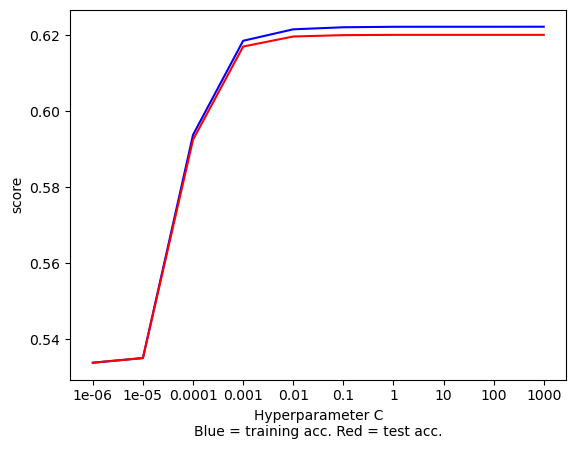

In [83]:
result_set = grid_model.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [84]:
def analyse_feature_importance(grid_model, feature_names, n_to_display=3):
    model = grid_model.best_estimator_
    importances = abs(model.coef_[0])
    
    # Sort the indices of the feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Print the top n important features
    print(f"Top {n_to_display} important features:")
    for i in range(n_to_display):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
analyse_feature_importance(grid_model, X.columns, 3)

#output: top 3 variable with absolute values of the coefficients (or weights)

Top 3 important features:
1. number_inpatient: 0.5083
2. number_emergency: 0.2550
3. number_outpatient: 0.1469


In [85]:
#Recursive Feature Elimination (RFE)
rfe_model = RFECV(estimator = LogisticRegression(random_state=42), cv=10)
rfe_model.fit(X_train, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe_model.n_features_)

Original feature set 22
Number of features after elimination 8


In [86]:
X_train_sel = rfe_model.transform(X_train)
X_test_sel = rfe_model.transform(X_test)

In [87]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv_model = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=42), return_train_score=True,cv=10, n_jobs=-1)
rfe_cv_model.fit(X_train_sel, y_train)

print("RFE_CV_MODEL \n")
print("Train accuracy:", rfe_cv_model.score(X_train_sel, y_train))
print("Test accuracy:", rfe_cv_model.score(X_test_sel, y_test))
print("-------------------------------------------------------")
y_pred = rfe_cv_model.predict(X_test_sel)
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
# print parameters of the best model
print(rfe_cv_model.best_params_)

RFE_CV_MODEL 

Train accuracy: 0.621
Test accuracy: 0.6296666666666667
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.81      0.70      3203
           1       0.66      0.42      0.52      2797

    accuracy                           0.63      6000
   macro avg       0.64      0.62      0.61      6000
weighted avg       0.64      0.63      0.61      6000

-------------------------------------------------------
{'C': 0.01}


Total number of models:  10


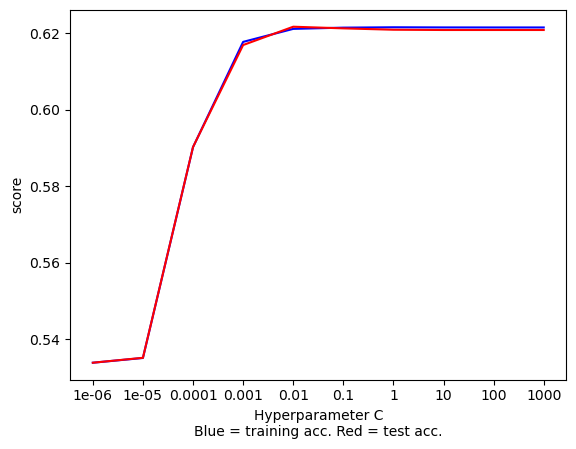

In [88]:
result_set = rfe_cv_model.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [89]:
def analyse_feature_importance(model, feature_names, n_to_display=3):
    # Get the coefficients (absolute values) from the logistic regression model
    importances = abs(model.coef_[0])
    
    # Sort the indices of the feature importances in descending order
    indices = np.argsort(importances)[::-1]
    
    # Print the top n important features
    print("Top {} important features:".format(n_to_display))
    for i in range(n_to_display):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Assuming you have a trained logistic regression model and feature names
analyse_feature_importance(rfe_cv_model.best_estimator_, X.columns, 3)

Top 3 important features:
1. num_lab_procedures: 0.4898
2. medical_specialty: 0.2330
3. time_in_hospital: 0.1427


In [90]:
y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_grid = grid_model.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv_model.predict_proba(X_test_sel)
y_pred_proba_rfe_cv_class_1 = y_pred_proba_rfe_cv[:, 1] #ValueError: y should be a 1d array, got an array of shape (6000, 2) instead.
 
roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_grid = roc_auc_score(y_test, y_pred_proba_grid[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `Normal model`:", roc_index_lr)
print("ROC index on test for `GridSearchCV`:", roc_index_grid)
print("ROC index on test for `RFE_cv`:", roc_index_rfe_cv)

ROC index on test for `Normal model`: 0.6728221475420064
ROC index on test for `GridSearchCV`: 0.6728221475420064
ROC index on test for `RFE_cv`: 0.672389667311136


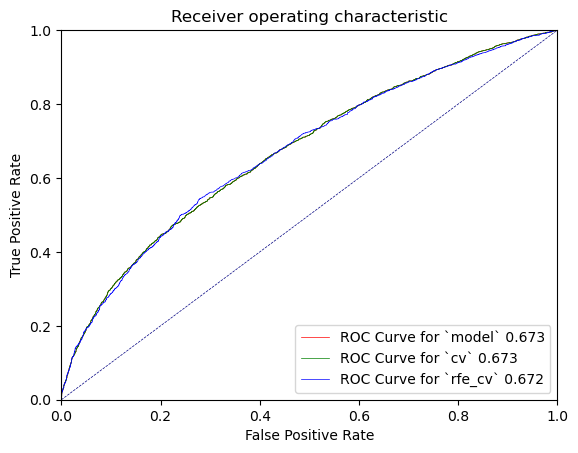

In [91]:

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_pred_proba_grid[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv_class_1)

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_grid, tpr_grid, label='ROC Curve for `cv` {:.3f}'.format(roc_index_grid), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [92]:
#select the features selected by rfe_model using their support
rfe_selected_features = X.columns[rfe_model.support_]
rfe_selected_features

Index(['age', 'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'diabetesMed'],
      dtype='object')

In [93]:
# Perform prediction on the selected test features
y_pred = rfe_cv_model.predict(X_test_sel)

# Reverse scaling for the selected test features
X_test_original = scaler.inverse_transform(X_test)
selected_features_mask = rfe_model.support_
# Get the selected columns from the original test data
patients_readmitted = pd.DataFrame(X_test_original, columns=X.columns)[rfe_selected_features]
# Reverse the label encoding for categorical features that are included in the selected features
for column in rfe_selected_features:
    if column in label_encoders:
        patients_readmitted[column] = label_encoders[column].inverse_transform(patients_readmitted[column].astype(int))

patients_readmitted['Actual'] = y_test.values
patients_readmitted['Predicted'] = y_pred
patients_readmitted = patients_readmitted.drop('Actual', axis = 1)
patients_readmitted = patients_readmitted[patients_readmitted['Predicted'] ==1]
patients_readmitted

age  num_procedures  num_medications  number_outpatient  \
0     [80-90)             3.0             36.0                0.0   
14    [60-70)             0.0             10.0                0.0   
15    [50-60)             0.0             12.0                0.0   
18    [80-90)             0.0             21.0                3.0   
21    [60-70)             0.0             12.0                0.0   
...       ...             ...              ...                ...   
5987  [80-90)             0.0             13.0                5.0   
5989  [70-80)             0.0             16.0                0.0   
5990  [50-60)             0.0             13.0                0.0   
5995  [50-60)             0.0             24.0                0.0   
5998  [70-80)             0.0             20.0                5.0   

      number_emergency  number_inpatient  number_diagnoses  diabetesMed  \
0                  0.0               1.0               9.0         True   
14                 0.0               1.0               9.0         True   
15                 0.0               2.0               4.0         True   
18                 1.0               1.0               9.0         True   
21                 0.0               1.0               9.0         True   
...                ...               ...               ...          ...   
5987               0.0               0.0               9.0         True   
5989               0.0               2.0               6.0         True   
5990               2.0               1.0               6.0         True   
5995               0.0               1.0               9.0         True   
5998               1.0               1.0               9.0         True   

      Predicted  
0             1  
14            1  
15            1  
18            1  
21            1  
...         ...  
5987          1  
5989          1  
5990          1  
5995          1  
5998          1  

[1793 rows x 9 columns]

In [94]:
print(patients_readmitted.describe())
print(patients_readmitted['age'].value_counts())

       num_procedures  num_medications  number_outpatient  number_emergency  \
count     1793.000000      1793.000000        1793.000000       1793.000000   
mean         0.945343        18.378137           1.172337          0.693252   
std          1.371473         7.655735           2.341368          1.558260   
min          0.000000         1.000000           0.000000          0.000000   
25%          0.000000        13.000000           0.000000          0.000000   
50%          0.000000        17.000000           0.000000          0.000000   
75%          1.000000        23.000000           1.000000          1.000000   
max          6.000000        65.000000          29.000000         22.000000   

       number_inpatient  number_diagnoses  Predicted  
count       1793.000000       1793.000000     1793.0  
mean           2.091467          8.455661        1.0  
std            1.895866          1.289277        0.0  
min            0.000000          1.000000        1.0  
25%          

In [95]:
# saving rfe_cv_model
import pickle
lr_best = rfe_cv_model
roc_index_lr_best = roc_index_rfe_cv
fpr_lr_best = fpr_rfe_cv
tpr_lr_best = tpr_rfe_cv, 
with open('LR.pickle', 'wb') as f:
    pickle.dump([lr_best,roc_index_lr_best, fpr_lr_best, tpr_lr_best], f)


## Predictive Mining with Neural Networks

In [96]:
data = pd.read_csv('data/D2.csv')

categorical_columns = ['race', 'gender', 'age', 'medical_specialty', 'max_glu_serum', 'A1Cresult', 
                       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
                       'glipizide', 'glyburide', 'insulin', 'change','diabetesMed']
#dropping IDs and Unary columns 
dropping_cols = ['admission_type_id', 'discharge_disposition_id','admission_source_id', 'readmitted', 'acetohexamide', 'tolbutamide']


# Apply Label Encoding for categorical features
label_encoder = LabelEncoder()

#store encoders to reverse the encoding
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Save each encoder to disk
with open('nueralN_label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Split the data into features (X) and target (y)

X = data.drop(dropping_cols, axis=1)
y = data['readmitted']

from sklearn.neural_network import MLPClassifier

# Perform a train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 24), (6000, 24), (14000,), (6000,))

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

#default neural network 
default_nn = MLPClassifier(random_state=42)
default_nn.fit(X_train, y_train)
print("Default Neural Network")
print(" ")
print("Train accuracy:", default_nn.score(X_train, y_train))
print("Test accuracy:", default_nn.score(X_test, y_test))
y_pred = default_nn.predict(X_test)
print(classification_report(y_test, y_pred))
print(default_nn)

Default Neural Network
 
Train accuracy: 0.7115714285714285
Test accuracy: 0.6025
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      3203
           1       0.59      0.50      0.54      2797

    accuracy                           0.60      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.60      0.60      0.60      6000

MLPClassifier(random_state=42)


In [98]:
default_nn.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [99]:
# ConvergenceWarning, so increased the max_iter
model_2 = MLPClassifier(max_iter=800, random_state=42)
model_2.fit(X_train, y_train)
print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))
print(model_2)

Train accuracy: 0.7265
Test accuracy: 0.5883333333333334
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      3203
           1       0.56      0.51      0.54      2797

    accuracy                           0.59      6000
   macro avg       0.59      0.58      0.58      6000
weighted avg       0.59      0.59      0.59      6000

MLPClassifier(max_iter=800, random_state=42)


In [100]:
print(X_train.shape)

(14000, 24)


In [101]:
# GridSearchCV for hidden layers
params = {'hidden_layer_sizes': [(x,) for x in range(5, 24, 5)]}
cv_1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=42),return_train_score=True, cv=10, n_jobs=-1)
cv_1.fit(X_train, y_train)

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))
y_pred = cv_1.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv_1.best_params_) 

Train accuracy: 0.6322142857142857
Test accuracy: 0.6316666666666667
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      3203
           1       0.63      0.51      0.56      2797

    accuracy                           0.63      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.63      0.63      0.63      6000

{'hidden_layer_sizes': (5,)}


In [102]:
# GridSearchCV for combination pair of hidden layers and alpha 
params = {'hidden_layer_sizes': [(1,), (3,), (5,), (7,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=42), return_train_score=True,cv=10, n_jobs=-1)
cv_2.fit(X_train, y_train)
print("Optimal combination Classfication")
print()
print("Train accuracy:", cv_2.score(X_train, y_train))
print("Test accuracy:", cv_2.score(X_test, y_test))

y_pred = cv_2.predict(X_test)
print(classification_report(y_test, y_pred))

print(cv_2.best_params_)

Optimal combination Classfication

Train accuracy: 0.633
Test accuracy: 0.632
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      3203
           1       0.63      0.51      0.56      2797

    accuracy                           0.63      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.63      0.63      0.63      6000

{'alpha': 0.001, 'hidden_layer_sizes': (5,)}


Total number of models:  16


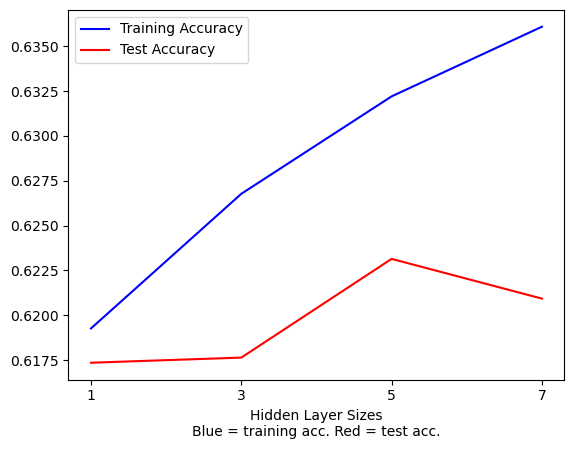

In [103]:
#overfitting checking
result_set = cv_2.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

# Hidden layer sizes used in the grid search
hidden_layer_sizes = [1, 3, 5, 7]  

print("Total number of models: ", len(test_result))

plt.plot(hidden_layer_sizes, train_result[:len(hidden_layer_sizes)], 'b', label='Training Accuracy')
plt.plot(hidden_layer_sizes, test_result[:len(hidden_layer_sizes)], 'r', label='Test Accuracy')
plt.xlabel('Hidden Layer Sizes\nBlue = training acc. Red = test acc.')
plt.xticks(hidden_layer_sizes)  
plt.legend()
plt.show()

In [104]:
# dimensionality reduction by selecting variables with best decision tree
import pickle
with open('DT.pickle', 'rb') as f:
    dt_best,roc_index_dt_best, fpr_dt_best, tpr_dt_best = pickle.load(f)
    
print(dt_best.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}


In [105]:
def analyse_feature_importance(model, feature_names, n_to_display=10):
    # grab feature importances from the model
    importances = model.feature_importances_
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)
    indices = indices[:n_to_display]
    for i in indices:
        print(feature_names[i], ':', importances[i])

analyse_feature_importance(dt_best.best_estimator_ , X.columns)

number_inpatient : 0.7662657504883603
number_outpatient : 0.06284565166549513
num_medications : 0.05154768597091513
number_emergency : 0.051281098849472656
age : 0.02891670729576608
num_lab_procedures : 0.0270347417935856
medical_specialty : 0.00669607593211375
number_diagnoses : 0.005412288004291194
change : 0.0
gender : 0.0


In [106]:
selectmodel = SelectFromModel(dt_best.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)

original_feature_names = data.columns  
# Get selected feature indices from SelectFromModel
selected_indices = selectmodel.get_support(indices=True)
# Map back to the original feature names
selected_features = original_feature_names[selected_indices]
print("Selected features being used as input for the neural network:")
print(selected_features)

(14000, 4)
Selected features being used as input for the neural network:
Index(['medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications'],
      dtype='object')


In [107]:
params = {'hidden_layer_sizes': [(1,), (3,), (5,), (7,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=42), return_train_score=True, cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y_train)

print("Dimensionality reduction/Feature Selection Classification\n")
print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv_sel_model.best_params_)

Dimensionality reduction/Feature Selection Classification

Train accuracy: 0.6205714285714286
Test accuracy: 0.6351666666666667
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      3203
           1       0.65      0.48      0.55      2797

    accuracy                           0.64      6000
   macro avg       0.64      0.63      0.62      6000
weighted avg       0.64      0.64      0.63      6000

{'alpha': 0.0001, 'hidden_layer_sizes': (5,)}


In [108]:
print("Before dimensionality reduction: ", cv_2.best_estimator_.n_iter_, ' iterations')
print("Before dimensionality reduction: ", cv_sel_model.best_estimator_.n_iter_, ' iterations')

Before dimensionality reduction:  87  iterations
Before dimensionality reduction:  34  iterations


Total number of models:  16


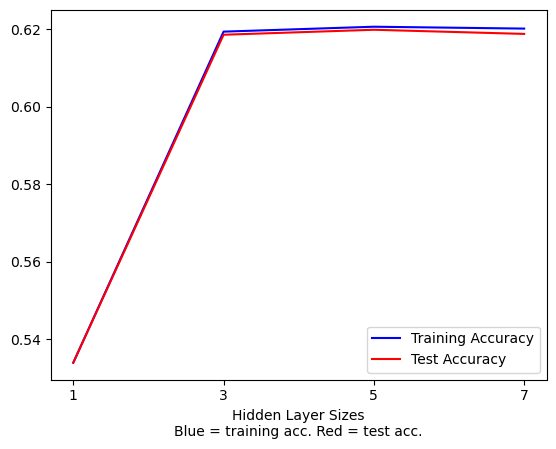

In [109]:
result_set = cv_sel_model.cv_results_
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

# Hidden layer sizes used in the grid search
hidden_layer_sizes = [1, 3, 5, 7]  

print("Total number of models: ", len(test_result))

plt.plot(hidden_layer_sizes, train_result[:len(hidden_layer_sizes)], 'b', label='Training Accuracy')
plt.plot(hidden_layer_sizes, test_result[:len(hidden_layer_sizes)], 'r', label='Test Accuracy')
plt.xlabel('Hidden Layer Sizes\nBlue = training acc. Red = test acc.')
plt.xticks(hidden_layer_sizes)  
plt.legend()
plt.savefig('cv_sel_model_overfitting.png')
plt.show()

In [110]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_1 = default_nn.predict_proba(X_test)
y_pred_proba_nn_2 = model_2.predict_proba(X_test)
y_pred_proba_cv_1 = cv_1.predict_proba(X_test)
y_pred_proba_cv_2 = cv_2.predict_proba(X_test)
y_pred_proba_cv_sel_model = cv_sel_model.predict_proba(X_test_sel_model)


roc_index_nn_1 = roc_auc_score(y_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y_test, y_pred_proba_nn_2[:, 1])
roc_index_cv_1 = roc_auc_score(y_test, y_pred_proba_cv_1[:, 1])
roc_index_cv_2 = roc_auc_score(y_test, y_pred_proba_cv_2[:, 1])
roc_index_cv_sel_model = roc_auc_score(y_test, y_pred_proba_cv_sel_model[:, 1])


print("ROC index on test for NN_default:", roc_index_nn_1)
print("ROC index on test for NN with relu:", roc_index_nn_2)
print("ROC index on test for NN with gridsearch 1:", roc_index_cv_1)
print("ROC index on test for NN with gridsearch 2:", roc_index_cv_2)
print("ROC index on test for NN with feature selection (model selection) and gridsearch:", roc_index_cv_sel_model)

from sklearn.metrics import roc_curve

fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y_test, y_pred_proba_nn_2[:,1])
fpr_cv_1, tpr_cv_1, thresholds_cv_1 = roc_curve(y_test, y_pred_proba_cv_1[:,1])
fpr_cv_2, tpr_cv_2, thresholds_cv_2 = roc_curve(y_test, y_pred_proba_cv_2[:,1])
fpr_cv_sel_model, tpr_cv_sel_model, thresholds_cv_sel_model = roc_curve(y_test, y_pred_proba_cv_sel_model[:,1])

ROC index on test for NN_default: 0.6396491446223045
ROC index on test for NN with relu: 0.6117594438803182
ROC index on test for NN with gridsearch 1: 0.678785340566601
ROC index on test for NN with gridsearch 2: 0.6786431338782208
ROC index on test for NN with feature selection (model selection) and gridsearch: 0.658856926118714


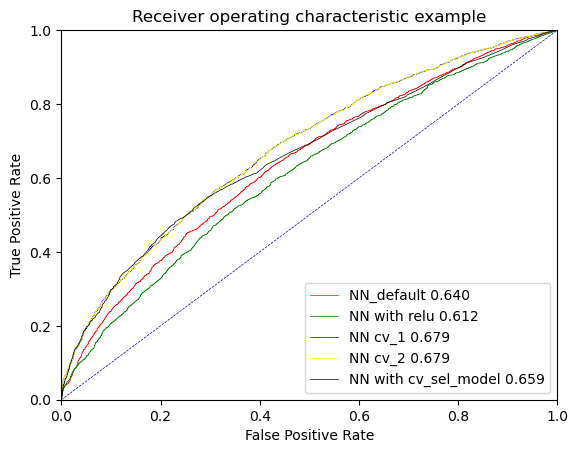

In [111]:
import matplotlib.pyplot as plt

plt.plot(fpr_nn_1, tpr_nn_1, label='NN_default {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN with relu {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)
plt.plot(fpr_cv_1, tpr_cv_1, label='NN cv_1 {:.3f}'.format(roc_index_cv_1), color='blue', lw=0.5)
plt.plot(fpr_cv_2, tpr_cv_2, label='NN cv_2 {:.3f}'.format(roc_index_cv_2), color='yellow', lw=0.5)
plt.plot(fpr_cv_sel_model, tpr_cv_sel_model, label='NN with cv_sel_model {:.3f}'.format(roc_index_cv_sel_model), color='black', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [112]:
##predictions using cv_2 
X_test_original = scaler.inverse_transform(X_test)
patients_readmitted = pd.DataFrame(X_test_original, columns=X.columns)
for column in categorical_columns:
    patients_readmitted[column] = label_encoders[column].inverse_transform(patients_readmitted[column].astype(int))

y_pred = cv_2.predict(X_test)
patients_readmitted['Actual'] = y_test.values
patients_readmitted['Predicted'] = y_pred
patients_readmitted = patients_readmitted.drop('Actual', axis = 1)
patients_readmitted = patients_readmitted[patients_readmitted['Predicted'] ==1]
patients_readmitted.head()

race  gender      age  time_in_hospital medical_specialty  \
0         Caucasian    Male  [80-90)               8.0  InternalMedicine   
7   AfricanAmerican    Male  [60-70)               3.0           Invalid   
10        Caucasian    Male  [60-70)               2.0           Invalid   
15        Caucasian  Female  [50-60)               9.0           Invalid   
16        Caucasian    Male  [50-60)               5.0           Invalid   

    num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0                 58.0             3.0             36.0                0.0   
7                 27.0             3.0             21.0                0.0   
10                51.0             0.0              8.0                3.0   
15                 1.0             0.0             12.0                0.0   
16                63.0             0.0             15.0                0.0   

    number_emergency  ...  repaglinide  nateglinide chlorpropamide  \
0                0.0  ...           No       Steady             No   
7                0.0  ...           No           No             No   
10               0.0  ...           No           No             No   
15               0.0  ...           No           No             No   
16               2.0  ...           No           No             No   

   glimepiride glipizide glyburide insulin change diabetesMed Predicted  
0       Steady        No        No    Down   True        True         1  
7           No        No        No    Down   True        True         1  
10          No        No        No  Steady  False        True         1  
15          No        No        No      No  False        True         1  
16          No        No    Steady      No  False        True         1  

[5 rows x 25 columns]

In [113]:
# provide charateristics with top5 importnat variables
result = permutation_importance(cv_2.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
importance_scores = result.importances_mean  
top_5_indices = importance_scores.argsort()[-3:][::-1]
top_5_features = [feature_names[idx] for idx in top_5_indices]

print("Top 5 important features and their importance scores:")
for idx in top_5_indices:
    print(f"{feature_names[idx]}: {importance_scores[idx]}")

Top 5 important features and their importance scores:
number_inpatient: 0.059783333333333334
number_emergency: 0.010750000000000004
number_outpatient: 0.007166666666666666


In [114]:
patients_readmitted[top_5_features].describe(include = 'all')

number_inpatient  number_emergency  number_outpatient
count       2241.000000       2241.000000        2241.000000
mean           1.704596          0.594378           1.077198
std            1.868972          1.426830           2.159246
min            0.000000          0.000000           0.000000
25%            1.000000          0.000000           0.000000
50%            1.000000          0.000000           0.000000
75%            2.000000          1.000000           1.000000
max           15.000000         22.000000          29.000000

## Final remarks: Decision making for three predictive models

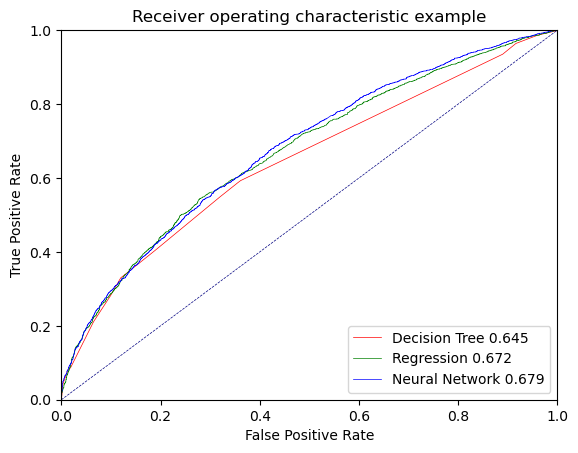

In [115]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the data
with open('DT.pickle', 'rb') as f:
    dt_best, roc_index_dt_best, fpr_dt_best, tpr_dt_best = pickle.load(f)
with open('LR.pickle', 'rb') as f:
    lr_best, roc_index_lr_best, fpr_lr_best, tpr_lr_best = pickle.load(f)   

# Plot ROC curves
plt.plot(np.ravel(fpr_dt_best), np.ravel(tpr_dt_best), label='Decision Tree {:.3f}'.format(roc_index_dt_best), color='red', lw=0.5)
plt.plot(np.ravel(fpr_lr_best), np.ravel(tpr_lr_best), label='Regression {:.3f}'.format(roc_index_lr_best), color='green', lw=0.5)
plt.plot(np.ravel(fpr_cv_2), np.ravel(tpr_cv_2), label='Neural Network {:.3f}'.format(roc_index_cv_2), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [116]:
train_accuracy_dt = accuracy_score(y_train, dt_best.predict(X_train))  # For training accuracy
test_accuracy_dt = accuracy_score(y_test, dt_best.predict(X_test))      # For test accuracy
train_accuracy_lr = accuracy_score(y_train, lr_best.predict(X_train_sel))
test_accuracy_lr = accuracy_score(y_test, lr_best.predict(X_test_sel))
train_accuracy_nn = accuracy_score(y_train, cv_2.best_estimator_.predict(X_train))
test_accuracy_nn = accuracy_score(y_test, cv_2.best_estimator_.predict(X_test))

accuracy_table = pd.DataFrame({
    'Model': ['Decision Tree', 'Regression', 'Neural Network'],
    'Train Accuracy': [train_accuracy_dt, train_accuracy_lr, train_accuracy_nn],
    'Test Accuracy': [test_accuracy_dt, test_accuracy_lr, test_accuracy_nn],
    'ROC Index': [roc_index_dt_best, roc_index_lr_best, roc_index_cv_2]
})

accuracy_table

Model  Train Accuracy  Test Accuracy  ROC Index
0   Decision Tree        0.598357       0.608667   0.645411
1      Regression        0.621000       0.629667   0.672390
2  Neural Network        0.633000       0.632000   0.678643